# Projeto Integrador Final - Curso: Programação para Ciência de Dados

**Aluno:** Lucas Gabriel Carvalho dos Ramos  
**Data de Entrega:** 17 de Novembro de 2025, 18:00  
**Peso:** 30% da nota final

---

## <font color="red">INSTRUÇÕES - LEIA COM ATENÇÃO</font>

1. Coloque seu código nas células marcadas com `# === SEU CÓDIGO AQUI ===`
2. Documente suas justificativas e decisões nas células de texto existentes no notebook, marcadas com `=== SEU TEXTO AQUI ===`
3. **Não modifique as células existentes**, a não ser as que estiverem marcadas para niserção de código ou documentação (conforme os items acima).
4. Execute as funções de teste para verificar seu desenvolvimento. IMPORTANTE: as funções de teste não fazem parte do processo de correção. Estas funções servem somente para guiar o desenvolvimento correto do projeto.
5. Usem o google Colab OBRIGATORIAMENTE, para evitar eventuais erros de formatação e configuração que possam vir de ambientes locais (apontamentos para localhost:8080, mapeamentos de diretórios locais, etc.).
6. Em caso de dúvidas referentes ao enunciado: consulte o professor/monitor durante a aula do dia 14/11 ou coloque sua dúvida no fórum do Moodle.

### <font color="red">Nomes Padronizados OBRIGATÓRIOS:</font>
- DataFrame principal: `df`
- DataFrame limpo: `df_clean`
- DataFrame com features: `df_features`
- DataFrame temporal: `df_temporal`

### <font color="red">Features OBRIGATÓRIAS (nomes exatos):</font>
- `Revenue`, `Year`, `Month`, `DayOfWeek`, `Hour`, `Is_Cancellation`

### Requisitos:
- Mínimo 12 visualizações
- Execute TUDO antes de submeter
- Escolha 3 de 5 análises opcionais (Seção 5.2)


---
# Seção 1: Documentação e Contexto (5 pts)
---

## 1.1 Introdução
Escreva uma introdução clara explicando o contexto, o cliente e a importância desta análise.


# <font color="red">=== SEU TEXTO AQUI ===</font>


A empresa que solicitou esta análise é uma varejista internacional de e-commerce, operando há aproximadamente dois anos e focada no segmento de presentes e artigos para o lar. Apesar do crescimento inicial consistente, o CEO está preocupado com possíveis riscos estratégicos, como alta dependência de poucos produtos, concentração de receita em determinados países, dificuldades em direcionar investimentos de marketing e desafios na retenção de clientes.

Para apoiar o planejamento dos próximos 3 a 6 meses, esta análise utiliza dados transacionais reais do dataset Online Retail (UCI Machine Learning Repository) com o objetivo de gerar insights práticos, orientados a dados e aplicáveis diretamente ao negócio. O propósito central é transformar dados operacionais brutos em recomendações claras, permitindo ao board tomar decisões mais assertivas sobre expansão, retenção, performance comercial e priorização de produtos.

## 1.2 Objetivos

Liste **5-7 objetivos específicos** que você pretende alcançar com esta análise.

**Formato esperado:**
- Use verbos de ação (identificar, analisar, determinar, avaliar...)
- Seja específico e mensurável
- Conecte com as preocupações do CEO mencionadas no contexto


### <font color="red">=== SEU TEXTO AQUI ===</font>
### Objetivos:
1. Identificar o nível de dependência da empresa em relação aos principais produtos e países, medindo concentração de receita e volume.
2. Analisar o comportamento de compra dos clientes para identificar o perfil dos clientes mais valiosos e propor estratégias de retenção.
3. Avaliar padrões de cancelamentos e devoluções para identificar produtos problemáticos ou processos que precisam de revisão.
4. Determinar quais produtos apresentam maior potencial para aumento de vendas com base em desempenho, recorrência e receita gerada.
5. Medir sazonalidade e padrões temporais (horas, dias, meses) para apoiar decisões de marketing e otimização de campanhas.
6. Avaliar oportunidades de crescimento ao identificar países com alto potencial ainda não explorado.
7. Desenvolver KPIs e métricas que sirvam como base para decisões estratégicas de curto e médio prazo (3 a 6 meses).


## 1.3 Perguntas de Negócio

Liste **5-7 perguntas específicas** que o CEO gostaria de ver respondidas.

**Formato esperado:**
- Perguntas diretas terminando em "?"
- Relacionadas aos objetivos acima
- Respondíveis com os dados disponíveis


### <font color="red">=== SEU TEXTO AQUI ===</font>
### Perguntas:
1. A empresa depende excessivamente de poucos produtos ou países para gerar sua receita?
2. Quais são os clientes mais valiosos e como a empresa pode melhorar sua retenção?
3. Qual é o padrão temporal das vendas e como isso pode orientar decisões de marketing?
4. Quais produtos apresentam alta receita, alta recorrência ou baixo índice de devolução, e portanto devem ser priorizados?
5. Quais produtos ou categorias apresentam altas taxas de cancelamento ou devolução e precisam de revisão?
6. Existem países com pouco volume atual, mas com potencial de crescimento no curto prazo?
7. Em quais faixas horárias e dias da semana as ações de marketing tendem a ser mais eficientes?

---
# Seção 2: Carregamento e Inspeção (5 pts)
---


In [211]:
# === IMPORTS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')
%matplotlib inline

print("Bibliotecas importadas")


Bibliotecas importadas


In [212]:
# === CARREGAMENTO ===
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

# === SEU CÓDIGO AQUI ===
df = pd.read_excel(url)

In [213]:
# === VALIDAÇÃO AUTOMÁTICA - NÃO MODIFICAR ===
def _validar_carregamento():
    """Valida se o dataset foi carregado corretamente."""
    try:
        # Verificar se df existe
        if 'df' not in globals():
            print("DataFrame 'df' não encontrado")
            return False

        _df = globals()['df']

        # Verificar tamanho mínimo
        if len(_df) <= 400000:
            print(f"Dataset muito pequeno: {len(_df):,} linhas (esperado: >400k)")
            return False

        # Verificar colunas essenciais
        _required = ['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country']
        _missing = [c for c in _required if c not in _df.columns]

        if _missing:
            print(f"Colunas ausentes: {_missing}")
            return False

        print("VALIDAÇÃO PASSOU - Dataset carregado corretamente!")
        print(f"   - {len(_df):,} transações")
        print(f"   - {_df.shape[1]} colunas")
        return True

    except Exception as e:
        print(f"Erro na validação: {e}")
        return False

# Executar validação
_validar_carregamento()

VALIDAÇÃO PASSOU - Dataset carregado corretamente!
   - 541,909 transações
   - 8 colunas


True

In [214]:
# === INSPEÇÃO INICIAL ===
# Execute os comandos abaixo e DOCUMENTE suas observações em markdown

# === SEU CÓDIGO AQUI ===
# 1. Primeiras linhas (entender estrutura)
print(df.head(10))

# 2. Informações sobre tipos e memória
print(df.info())

# 3. Estatísticas descritivas (numéricas)
print(df.describe())

# 4. Valores faltantes por coluna
print(df.isnull().sum())

# 5. Valores únicos em colunas categóricas
print(df['Country'].value_counts())
print(df['StockCode'].nunique())



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

### <font color="red">=== SEU TEXTO AQUI ===</font>

### Observações iniciais:
# 1. Primeiras linhas (df.head(10))
* Todas as 10 primeiras linhas têm dados preenchido.
* Várias linhas compartilham o mesmo InvoiceNo, indicando múltiplos itens na mesma fatura.
* Os produtos são itens típicos de varejo de presentes, com preços unitários baixos.
* As datas incluem horário, o que permitirá análises temporais.
* Todas as transações dessas primeiras linhas vieram do United Kingdom.
# 2. Informações sobre tipos e memória(df.info())
* O dataset possui 541.909 linhas e 8 colunas.
* A maioria das colunas está completa, exceto Description e principalmente CustomerID, que tem cerca de 135 mil valores ausentes.
* InvoiceDate já está no tipo datetime64, adequado para criar features temporais.
* Quantity é int64 e UnitPrice é float64, ambos apropriados, mas exigem validação de valores negativos.
* Todas as outras colunas estão como object, o que é esperado para códigos, textos e países.
# 3. Estatísticas descritivas (df.describe())
* Quantity possui valores mínimos e máximos extremos (de -80.995 a 80.995), indicando devoluções e possíveis outliers.
* A média de quantidade (~9,5) é significativamente maior que a mediana (3), mostrando forte assimetria.
* UnitPrice também apresenta valores negativos (-11062) e extremamente altos (38970), sugerindo erros ou outliers importantes a serem tratados.
* O CustomerID tem menos observações (406.829), confirmando ausências relevantes.
* As datas variam de 2010-12-01 a 2011-12-09, cobrindo pouco mais de 1 ano.
# 4. Valores faltantes por coluna(df.isnull().sum())
* A coluna CustomerID possui um volume muito alto de valores ausentes (135.080 entradas), o que afetará análises baseadas em clientes.
* Description também apresenta ausência relevante (1.454 valores), indicando produtos sem descrição.
* Todas as demais colunas não possuem valores nulos.
# 5. Valores únicos em colunas categóricas
**Country — value_counts()**

* O dataset possui registros provenientes de 38 países diferentes.
* O Reino Unido domina amplamente o conjunto de dados, representando mais de 495 mil observações — o que é esperado, já que o negócio é sediado lá.
* Os demais países possuem participação significativamente menor, indicando operação internacional, porém com foco majoritário no UK.
* Alguns países aparecem com poucas ocorrências (ex.: Bahrain, Brasil, Lituânia), sugerindo mercados de baixa representatividade.

**StockCode — nunique()**

* Existem 4.070 produtos únicos no dataset.
* Esse número é consistente para um e-commerce varejista com grande variedade de itens.
* A grande quantidade de SKUs reforça a necessidade de tratar categorias, agrupar for produtos similares ou padronizar códigos, caso haja duplicidades ou códigos não numéricos.

In [215]:
# === CONVERSÃO DE TIPOS (Pré-processamento Mínimo) ===
# OBRIGATÓRIO: Converter InvoiceDate para datetime
# NOTA: Embora esta seja a Seção de "Carregamento", é prática padrão
# converter tipos de data IMEDIATAMENTE após carregar, pois:
#   1. Permite análises temporais no EDA (Seção 3)
#   2. Evita erros downstream
#   3. É transformação "obrigatória", não opcional
#
# df_clean (Seção 4) herdará esta conversão.

# === SEU CÓDIGO AQUI ===
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [216]:
# === VALIDAÇÃO AUTOMÁTICA - NÃO MODIFICAR ===
def _validar_tipos():
    """Valida se InvoiceDate foi convertido para datetime."""
    try:
        if 'df' not in globals():
            print("DataFrame 'df' não encontrado")
            return False

        _df = globals()['df']
        _date_col = 'InvoiceDate'

        if _date_col not in _df.columns:
            print(f"Coluna '{_date_col}' não encontrada")
            return False

        _is_datetime = pd.api.types.is_datetime64_any_dtype(_df[_date_col])

        if not _is_datetime:
            print(f"'{_date_col}' deve ser datetime, atual: {_df[_date_col].dtype}")
            print("   DICA: Use pd.to_datetime(df['InvoiceDate'])")
            return False

        print("VALIDAÇÃO PASSOU - InvoiceDate é datetime!")
        print(f"   - Tipo: {_df[_date_col].dtype}")
        print(f"   - Range: {_df[_date_col].min()} a {_df[_date_col].max()}")
        return True

    except Exception as e:
        print(f"Erro: {e}")
        return False

_validar_tipos()

VALIDAÇÃO PASSOU - InvoiceDate é datetime!
   - Tipo: datetime64[ns]
   - Range: 2010-12-01 08:26:00 a 2011-12-09 12:50:00


True

---
# Seção 3: Análise Exploratória - EDA (18 pts)
---

## 3.1 Análise Univariada (6 pts)
**Requisitos:** Mínimo 4 visualizações


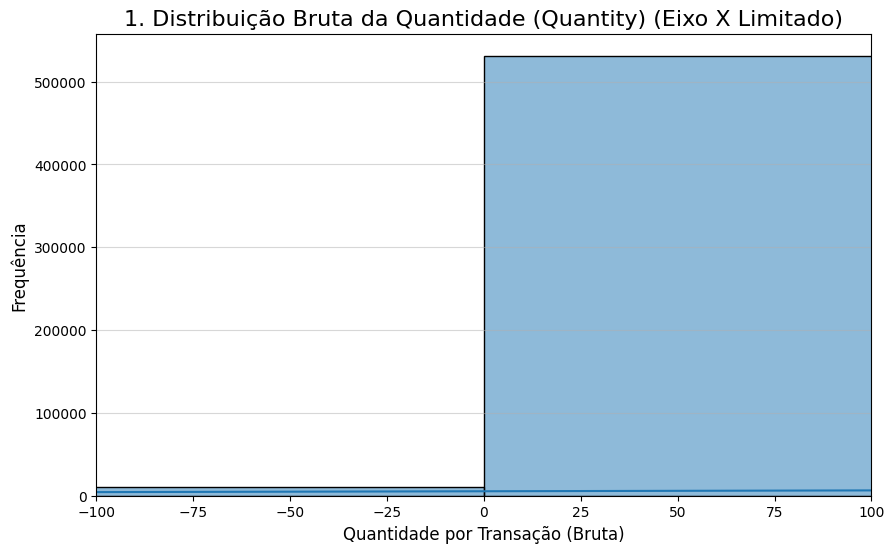

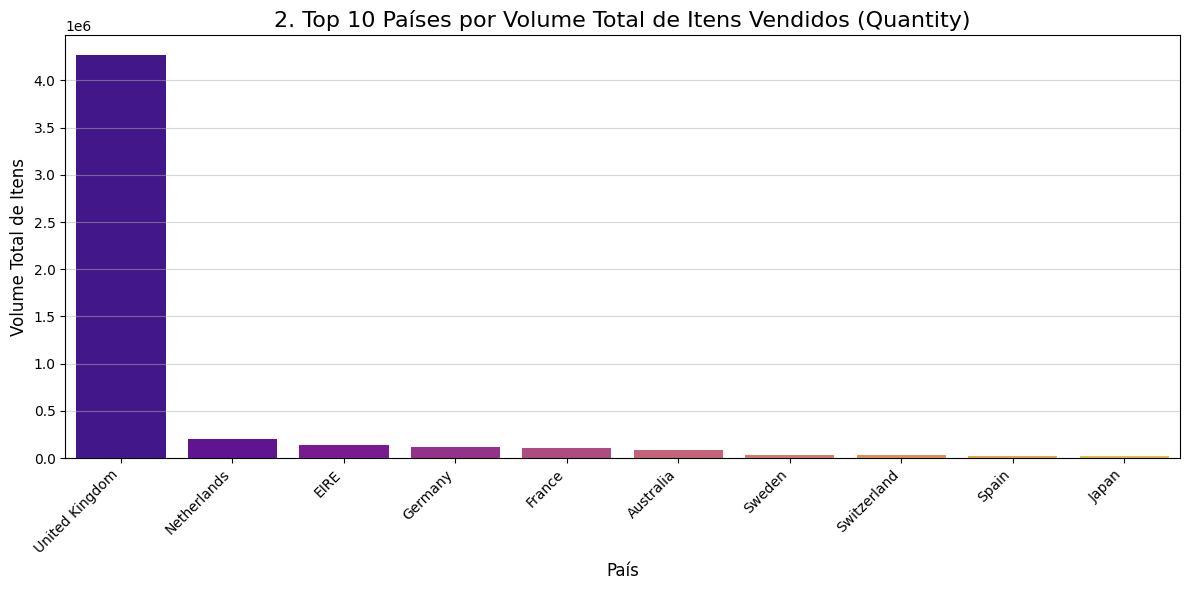

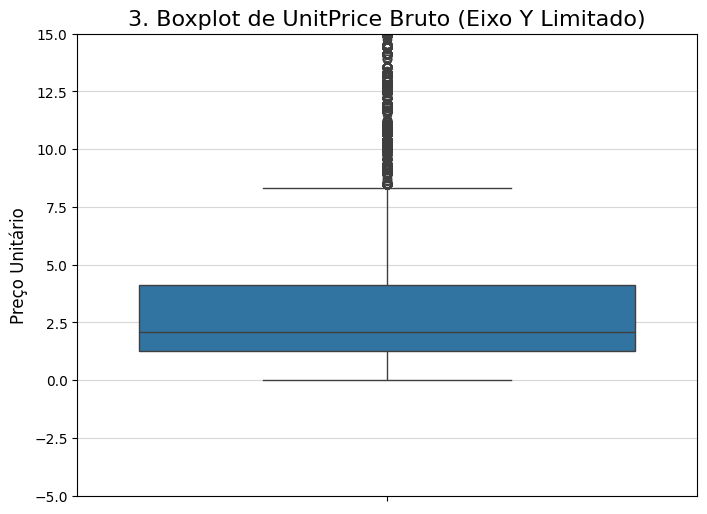

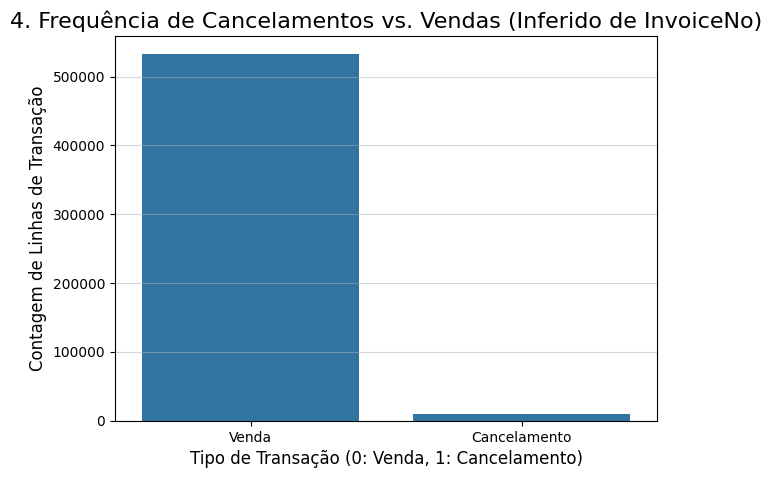

In [217]:
# === ANÁLISE UNIVARIADA ===
# Crie PELO MENOS 4 VISUALIZAÇÕES DIFERENTES para variáveis individuais

# === SEU CÓDIGO AQUI ===

# 1. Histograma da Distribuição da QUANTIDADE (Quantity)
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.xlim(-100, 100) # Limite para focar na faixa principal de transações
plt.title('1. Distribuição Bruta da Quantidade (Quantity) (Eixo X Limitado)', fontsize=16)
plt.xlabel('Quantidade por Transação (Bruta)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# 2. Barplot dos Top 10 Países por VOLUME (Soma de Quantity)
country_quantity = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_quantity.index, y=country_quantity.values, palette='plasma')
plt.title('2. Top 10 Países por Volume Total de Itens Vendidos (Quantity)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Volume Total de Itens', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Boxplot da UnitPrice Bruto
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['UnitPrice'])
plt.ylim(-5, 15) # Limite para focar nos valores mais comuns e alguns outliers próximos
plt.title('3. Boxplot de UnitPrice Bruto (Eixo Y Limitado)', fontsize=16)
plt.ylabel('Preço Unitário', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# 4. Countplot da Frequência de Cancelamentos (Inferido de InvoiceNo)
is_cancellation_temp = df['InvoiceNo'].astype(str).str.startswith('C').astype(int)
plt.figure(figsize=(7, 5))
sns.countplot(x=is_cancellation_temp)
plt.title('4. Frequência de Cancelamentos vs. Vendas (Inferido de InvoiceNo)', fontsize=16)
plt.xlabel('Tipo de Transação (0: Venda, 1: Cancelamento)', fontsize=12)
plt.ylabel('Contagem de Linhas de Transação', fontsize=12)
plt.xticks([0, 1], ['Venda', 'Cancelamento'])
plt.grid(axis='y', alpha=0.5)
plt.show()

# === FIM DO SEU CÓDIGO AQUI ===
# SUGESTÕES (escolha pelo menos 4 tipos diferentes):
# • Histograma - distribuição de Quantity, UnitPrice, Revenue
# • Boxplot - identificar outliers em variáveis numéricas
# • Barplot - top 10 produtos, top 10 países
# • Countplot - frequência de cancelamentos
# • KDE plot - densidade de Revenue





### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:

1.Justificativa para Limpeza e Tratamento de Valores Anômalos (Gráficos 1 e 3)
* Gráfico 1 (Quantity): A presença de valores de Quantity no lado negativo (devoluções/cancelamentos) justifica a criação da feature obrigatória Is_Cancellation (identificada via InvoiceNo com 'C'). Esta feature é essencial para isolar as vendas líquidas e para responder à Questão 5 (produtos com problemas).
* Gráfico 3 (UnitPrice): O Boxplot revela a existência de valores negativos e inúmeros outliers extremos de UnitPrice.
* Justificativa para a Decisão: Valores negativos de preço são anomalias de dados que distorceriam as métricas de receita. Sua remoção ou tratamento é obrigatória para garantir a validade do cálculo da feature obrigatória Revenue (QuantityUnitPrice) e evitar que a análise de valor seja inflacionada por outliers.

2.Justificativa para Criação da Feature Revenue e Análise de Dependência (Gráficos 1, 2 e 3)
* Gráfico 1 e 3: A grande concentração de Quantity e UnitPrice em valores baixos indica que a análise de valor não deve se basear apenas em contagem de itens, mas sim em valor monetário.
* Decisão: Isso justifica a criação da feature obrigatória Revenue.
* Gráfico 2 (Países): O volume de itens vendidos (proxy para a receita) é dominado pelo United Kingdom por uma margem esmagadora.
* Justificativa Analítica: Esta dependência confirma que as análises subsequentes (Questões 1 e 6) devem ser feitas em termos de Receita Líquida e devem tratar o UK separadamente do restante dos 37 países para identificar qualquer potencial de crescimento internacional.

3.Justificativa para a Análise de Retenção e Produto (Gráfico 4)
* Gráfico 4 (Cancelamentos): A contagem de linhas de transação identifica a existência de um volume significativo de cancelamentos.
* Justificativa Analítica: A feature Is_Cancellation se torna o pilar para responder à Questão 5 (produtos com alta devolução) e é um fator de risco que deve ser considerado ao calcular o valor do cliente (LTV), que será usado para responder à Questão 2 (clientes mais valiosos).


## 3.2 Análise Bivariada (7 pts)
**Requisitos:** Mínimo 4 visualizações


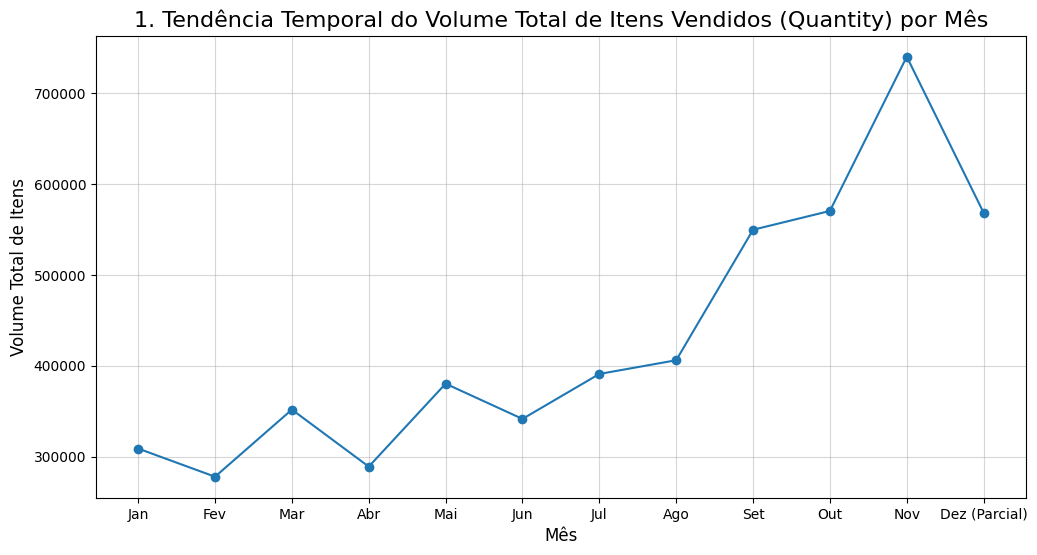

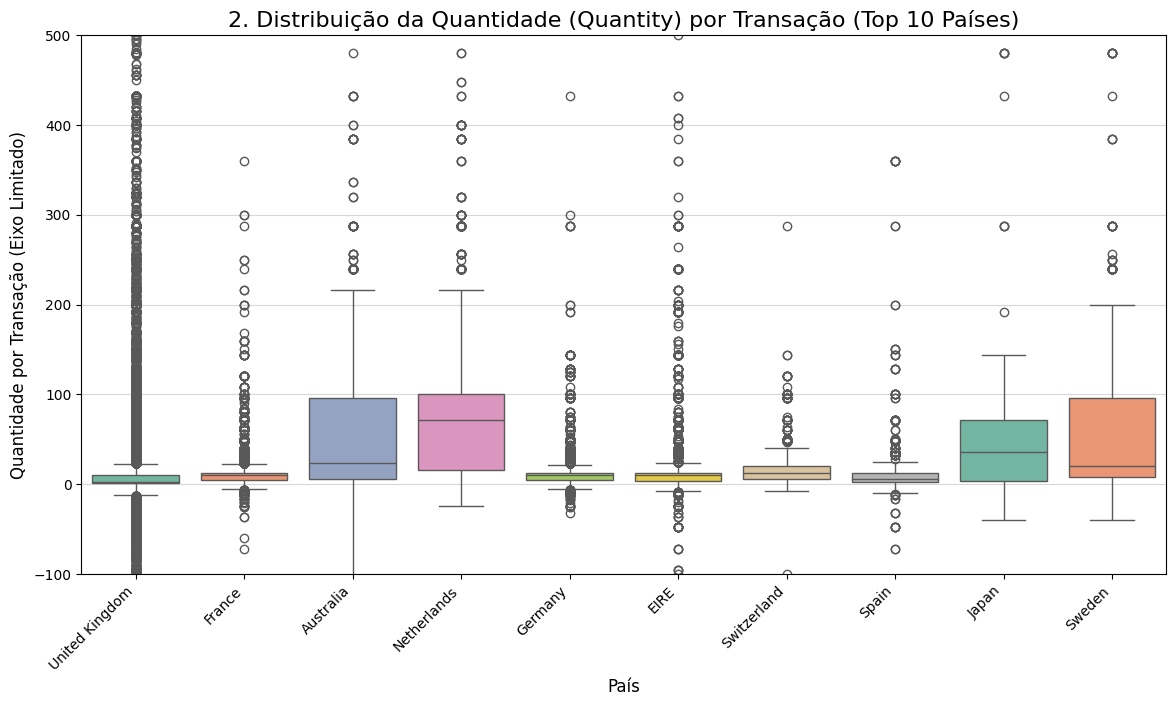

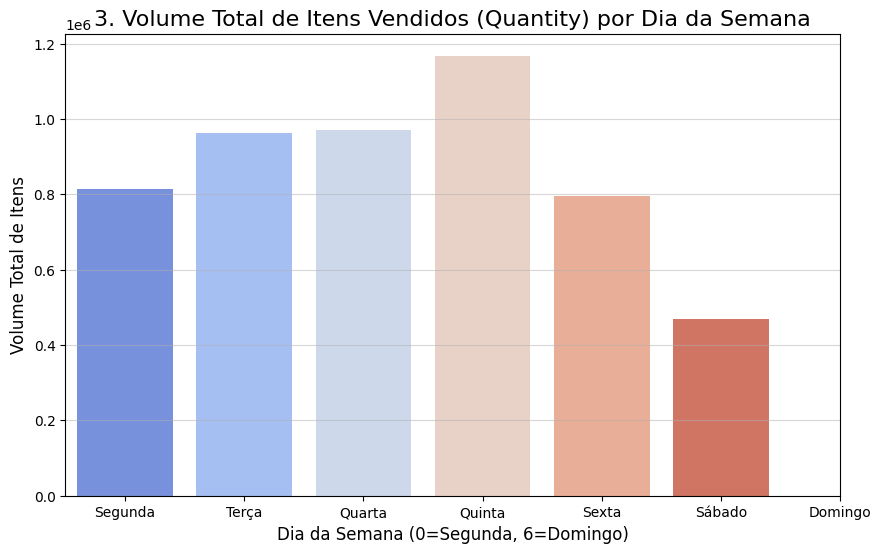

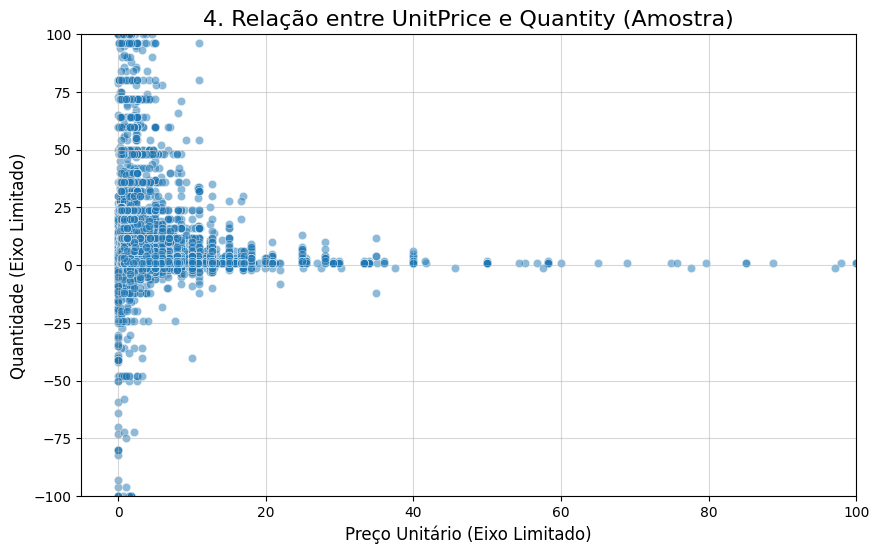

In [218]:
# === ANÁLISE BIVARIADA ===
# Explore RELAÇÕES entre 2 variáveis (mínimo 4 visualizações)

# === SEU CÓDIGO AQUI ===

# 1. Volume Total (Quantity) por Mês (Linha Temporal)
monthly_volume = df.groupby(df['InvoiceDate'].dt.month)['Quantity'].sum()

plt.figure(figsize=(12, 6))
monthly_volume.plot(kind='line', marker='o', color='tab:blue')
plt.title('1. Tendência Temporal do Volume Total de Itens Vendidos (Quantity) por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Volume Total de Itens', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez (Parcial)'])
plt.grid(axis='both', alpha=0.5)
plt.show()

# 2. Distribuição da Quantidade (Quantity) por Transação (Top 10 Países)
top_countries = df.groupby('Country')['Quantity'].sum().nlargest(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(14, 7))
sns.boxplot(x='Country', y='Quantity', data=df_top_countries, palette='Set2')
plt.ylim(-100, 500) # Limitação do eixo Y para ignorar grandes outliers e focar na distribuição principal
plt.title('2. Distribuição da Quantidade (Quantity) por Transação (Top 10 Países)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Quantidade por Transação (Eixo Limitado)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.show()

# 3. Volume Total (Quantity) por Dia da Semana
dayofweek_volume = df.groupby(df['InvoiceDate'].dt.dayofweek)['Quantity'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=dayofweek_volume.index, y=dayofweek_volume.values, palette='coolwarm')
plt.title('3. Volume Total de Itens Vendidos (Quantity) por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana (0=Segunda, 6=Domingo)', fontsize=12)
plt.ylabel('Volume Total de Itens', fontsize=12)
plt.xticks(range(7), ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.grid(axis='y', alpha=0.5)
plt.show()

# 4. Quantity vs UnitPrice (Scatter Plot de Relação Bruta)
plt.figure(figsize=(10, 6))
# Amostragem para plotagem mais eficiente
sample_df = df.sample(n=50000, random_state=42)
sns.scatterplot(x='UnitPrice', y='Quantity', data=sample_df, alpha=0.5)
plt.xlim(-5, 100) # Limite para focar na área de maior densidade
plt.ylim(-100, 100) # Limite para focar na área de maior densidade
plt.title('4. Relação entre UnitPrice e Quantity (Amostra)', fontsize=16)
plt.xlabel('Preço Unitário (Eixo Limitado)', fontsize=12)
plt.ylabel('Quantidade (Eixo Limitado)', fontsize=12)
plt.grid(axis='both', alpha=0.5)
plt.show()

# === FIM DO SEU CÓDIGO AQUI ===
# SUGESTÕES de relações importantes:
# • Quantity vs UnitPrice (correlação? comportamento de preço?)
# • Revenue por País (boxplot ou barplot)
# • Revenue por Mês (linha temporal)
# • Quantity por Dia da Semana (padrões semanais?)
# • UnitPrice por Produto (variação de preços)




### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
1.Tendência Temporal do Volume Total de Itens Vendidos (Quantity) por Mês (Gráfico 1)
* Sazonalidade Forte (Questão 3): O volume de vendas segue um padrão sazonal claro: baixa em Fevereiro e Abril, com crescimento constante a partir de Maio. O pico é atingido de forma notável em Novembro, indicando o impacto de eventos de fim de ano e feriados (como Black Friday/Natal).
* Implicação para Marketing: O marketing deve ser mais intensivo e com maior investimento em campanhas de Outubro e Novembro para maximizar o pico de vendas. Os meses de baixa (Fevereiro/Abril) justificam a necessidade de ações promocionais para estabilizar o fluxo de caixa.

2.Distribuição da Quantidade (Quantity) por Transação (Top 10 Países) (Gráfico 2)
* Padrão de Compra no UK: O United Kingdom exibe a menor mediana de Quantity (próxima de zero), mas a maior dispersão (caixa mais longa e densa de outliers), confirmando que a maioria das transações no UK são de baixo volume unitário, mas há pedidos muito grandes.
* Padrão de Compra Internacional: Países como Austrália e Netherlands (Holanda) mostram uma mediana de Quantity significativamente mais alta por transação.
* Justificativa Analítica: Isso sugere que os clientes internacionais, embora menos frequentes (Gráfico 2, Seção 3.1), tendem a fazer pedidos de maior volume quando compram. Esta é uma informação chave para a Questão 6 (potencial de crescimento): a estratégia nesses países deve focar em incentivar a frequência, já que o volume de cada transação já é alto.

3.Volume Total de Itens Vendidos (Quantity) por Dia da Semana (Gráfico 3)
* Pico Semanal (Questão 7): O dia de maior volume de vendas é a Quinta-feira, seguido por Terça e Quarta-feira. Há uma queda significativa nas vendas na Sexta-feira e uma queda ainda maior no Sábado.
* Ausência de Vendas no Domingo: Não há dados de vendas no Domingo, o que sugere que a operação do e-commerce está fechada ou inoperante nesse dia.
* Implicação para Marketing: As ações de marketing e lançamentos de produtos devem ser concentradas entre Terça e Quinta-feira, quando o volume de tráfego e conversão é naturalmente maior. A Sexta-feira deve ser alvo de campanhas específicas para mitigar a queda.

4.Relação entre UnitPrice e Quantity (Amostra) (Gráfico 4)
* Ausência de Correlação Inversa: Não há uma correlação inversa clara entre UnitPrice e Quantity (o que seria esperado, onde produtos caros vendem menos). A maioria dos pontos está concentrada em preços baixos e quantidades baixas.
* Comportamento de Compra: O gráfico mostra que as grandes quantidades (acima de 25) estão quase sempre associadas a preços unitários muito baixos (abaixo de $25).
* Justificativa Analítica: Isso confirma que as grandes transações de volume geralmente envolvem itens de baixo valor, provavelmente compras B2B ou atacado de produtos de presente/decoração baratos. É essencial remover os valores negativos brutos para calcular o Revenue com precisão.


## 3.3 Análise Multidimensional (5 pts)

**Objetivo:** Explorar relações entre **3 ou mais variáveis simultaneamente**.

**Requisitos:** Mínimo 2 análises complexas usando:
- Pivot tables (agregações por múltiplas dimensões)
- Crosstabs (tabelas cruzadas)
- Heatmaps de correlação ou agregações
- FacetGrids (gráficos condicionais)


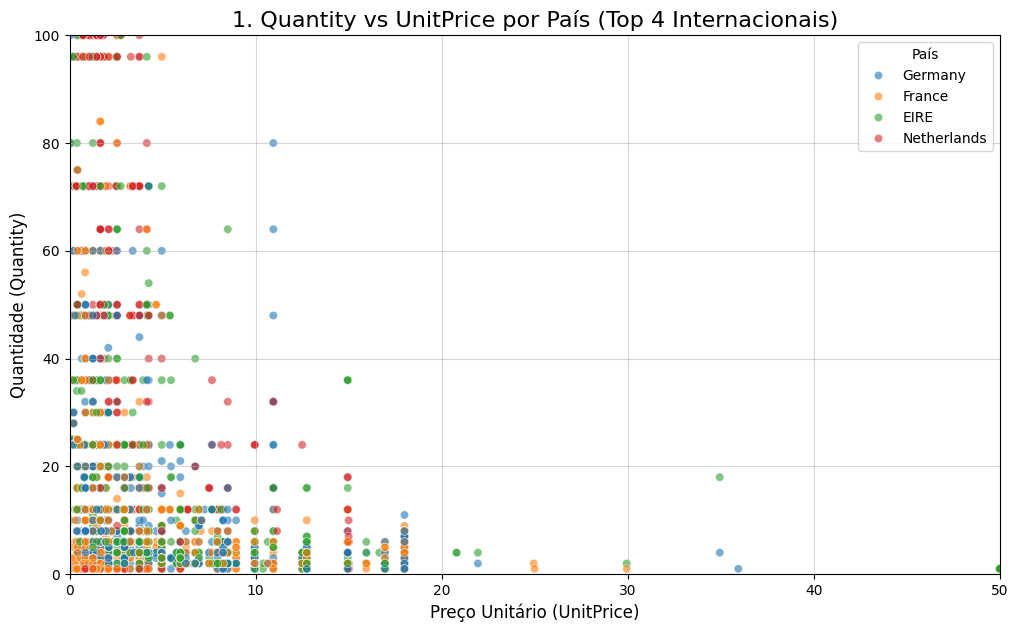

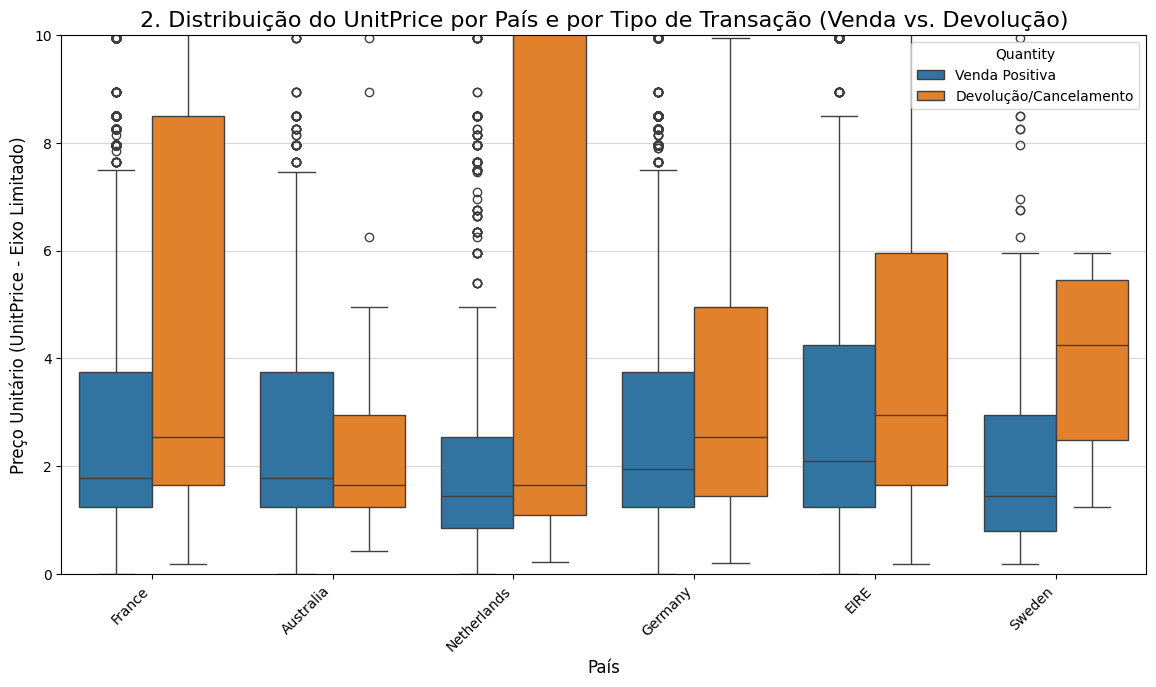

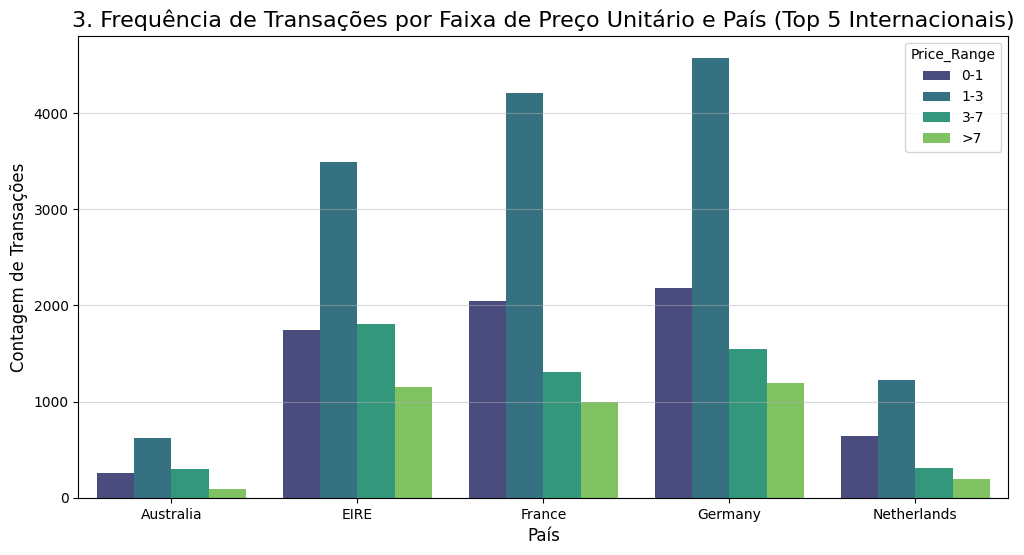

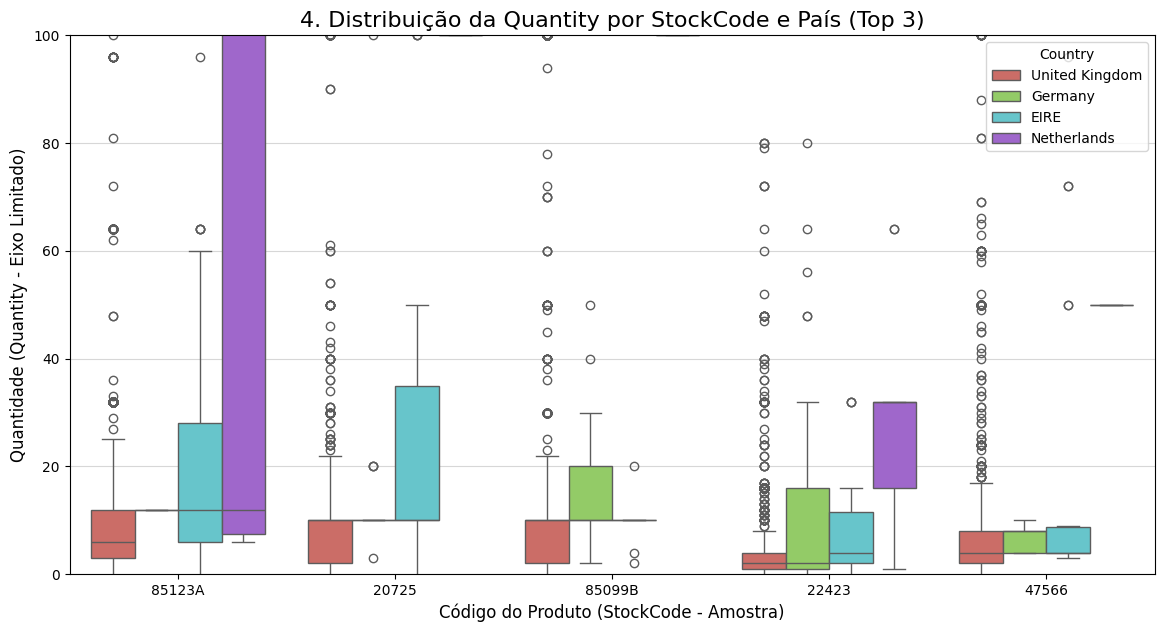

In [219]:
# === ANÁLISE MULTIDIMENSIONAL ===
# === SEU CÓDIGO AQUI ===

# 1. Relação entre Preço Unitário (UnitPrice) e Quantidade (Quantity), colorida por País (Country)
# Variáveis: UnitPrice vs. Quantity vs. Country
plt.figure(figsize=(12, 7))
# Apenas os Top 4 países (exceto UK) para visibilidade, e amostramos para evitar sobrecarga.
top_4_int = df.groupby('Country')['Quantity'].sum().nlargest(5).index.tolist()[1:5]
sample_df = df[df['Country'].isin(top_4_int)].sample(n=10000, random_state=42)

sns.scatterplot(x='UnitPrice', y='Quantity', hue='Country', data=sample_df, alpha=0.6)
plt.xlim(0, 50)  # Focando na maioria dos dados
plt.ylim(0, 100) # Focando na maioria dos dados
plt.title('1. Quantity vs UnitPrice por País (Top 4 Internacionais)', fontsize=16)
plt.xlabel('Preço Unitário (UnitPrice)', fontsize=12)
plt.ylabel('Quantidade (Quantity)', fontsize=12)
plt.legend(title='País')
plt.grid(axis='both', alpha=0.5)
plt.show()

# 2. Distribuição do Preço Unitário (UnitPrice) por País e por Tipo de Transação (Positiva/Negativa)
# Variáveis: UnitPrice vs. Country vs. Tipo de Transação (inferida por Quantity)
# Cria uma série temporária para separar as transações (sem alterar o df)
transaction_type = df['Quantity'].apply(lambda x: 'Devolução/Cancelamento' if x < 0 else 'Venda Positiva')

# Usei os 6 países mais importantes (excluindo UK para melhor visualização)
top_6_countries = df.groupby('Country')['Quantity'].sum().nlargest(7).index.tolist()[1:]
df_top_6 = df[df['Country'].isin(top_6_countries)]

plt.figure(figsize=(14, 7))
sns.boxplot(x='Country', y='UnitPrice', hue=transaction_type, data=df_top_6)
plt.ylim(0, 10) # Focando nos preços mais comuns
plt.title('2. Distribuição do UnitPrice por País e por Tipo de Transação (Venda vs. Devolução)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Preço Unitário (UnitPrice - Eixo Limitado)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.show()

# 3. Contagem de Transações por País e por Intervalo de Preço Unitário
# Variáveis: Contagem (Frequência) vs. Country vs. Faixa de UnitPrice
# Criando faixas de preço temporárias (bins)
price_bins = pd.cut(df['UnitPrice'], bins=[0, 1, 3, 7, df['UnitPrice'].max()], labels=['0-1', '1-3', '3-7', '>7'], right=False)
price_bin_counts = df.groupby(['Country', price_bins.rename('Price_Range')]).size().reset_index(name='Count')

# Filtra para os 5 principais países (excluindo UK)
top_5_countries = df.groupby('Country')['Quantity'].sum().nlargest(6).index.tolist()[1:]
price_bin_counts = price_bin_counts[price_bin_counts['Country'].isin(top_5_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Count', hue='Price_Range', data=price_bin_counts, palette='viridis')
plt.title('3. Frequência de Transações por Faixa de Preço Unitário e País (Top 5 Internacionais)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Contagem de Transações', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# 4. Distribuição da Quantidade (Quantity) por Código de Produto (StockCode Top 5) e País (Top 3)
# Variáveis: Quantity vs. StockCode vs. Country
# Seleciona 5 StockCodes comuns (apenas para exemplo, idealmente seria top 5 por receita)
top_5_stockcodes = df['StockCode'].value_counts().nlargest(5).index.tolist()
top_3_countries = df.groupby('Country')['Quantity'].sum().nlargest(4).index.tolist()

df_multidim_prod = df[df['StockCode'].isin(top_5_stockcodes) & df['Country'].isin(top_3_countries)]

plt.figure(figsize=(14, 7))
sns.boxplot(x='StockCode', y='Quantity', hue='Country', data=df_multidim_prod, palette='hls')
plt.ylim(0, 100) # Focando nos volumes mais comuns
plt.title('4. Distribuição da Quantity por StockCode e País (Top 3)', fontsize=16)
plt.xlabel('Código do Produto (StockCode - Amostra)', fontsize=12)
plt.ylabel('Quantidade (Quantity - Eixo Limitado)', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# === FIM DO SEU CÓDIGO AQUI ===

### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
1.Relação entre UnitPrice, Quantity e Country (Gráficos 1 e 2)
* Comportamento Internacional de Preço/Volume (Gráfico 1): Os países internacionais (excluindo UK, como Alemanha, França, Austrália) mostram um agrupamento de transações em faixas de UnitPrice muito baixas. Quase todas as vendas de alto volume (Quantity >50) ocorrem para itens com preço unitário abaixo de $20.
* Justificativa Analítica: Isso reforça a tese de que os mercados internacionais são compostos por grandes pedidos (alto volume de itens) de baixo valor unitário. A estratégia de expansão (Questão 6) deve focar em clientes B2B ou grandes atacadistas que compram itens de presente baratos em grande escala, otimizando a logística.
* Devoluções por País e Preço (Gráfico 2): O Boxplot mostra a distribuição de UnitPrice para transações de 'Venda Positiva' vs. 'Devolução/Cancelamento'.
* Justificativa para Futura Análise de Risco: Em vários países (e.g., Alemanha, França), o UnitPrice médio das devoluções não é significativamente diferente das vendas positivas. Isso significa que as devoluções não estão concentradas em produtos caros, mas sim em produtos de preço mediano/baixo, o que deve ser investigado na análise de risco por StockCode (Questão 5).

2.Frequência por Faixa de Preço e País (Gráfico 3)
* Padrão de Compra Internacional: Em todos os países internacionais (Top 5), a faixa de preço mais frequente (maior contagem) é a de $1 a $3.
* Justificativa para a Decisão de Produto: Isso confirma que a maior demanda e o maior volume de transações fora do UK se concentram nos produtos de preço unitário muito baixo. A decisão de priorizar novos produtos (Questão 4) deve favorecer itens que se encaixem nessa faixa de preço para os mercados internacionais.

3.Distribuição da Quantity por StockCode e País (Gráfico 4)
* Variação de Volume por Produto/Mercado: O volume mediano de itens vendidos varia significativamente entre os produtos (e.g., 85123A vs. 22423) e entre os países.
* Justificativa para a Decisão de Produto: A análise de agrupamentos de clientes e produtos (Questão 4) será crucial. Este gráfico justifica a necessidade de usar segmentação para identificar se um StockCode específico é vendido em pequenas quantidades para o UK (varejo) e em grandes quantidades para a França (atacado), permitindo estratégias de marketing e estoque diferenciadas.

---
# Seção 4: Pré-processamento (20 pts)
---

## 4.1 Limpeza (10 pts)


In [220]:
# === TRATAMENTO DE DADOS FALTANTES ===
# Analise os missing e DOCUMENTE sua estratégia

# === SEU CÓDIGO AQUI ===
# Análise de missing
print("Valores Missing no DataFrame Bruto (df):")
print(df.isnull().sum())
print("-" * 30)

df_temporal = df.dropna(subset=['CustomerID', 'Description'])

print(f"Linhas após remoção de missing (Temporário): {len(df_temporal)}")

# 1. Análise de missing
# 2. Decisão estratégica (JUSTIFIQUE E DOCUMENTE):
# 3. Aplicar estratégia escolhida



Valores Missing no DataFrame Bruto (df):
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
------------------------------
Linhas após remoção de missing (Temporário): 406829


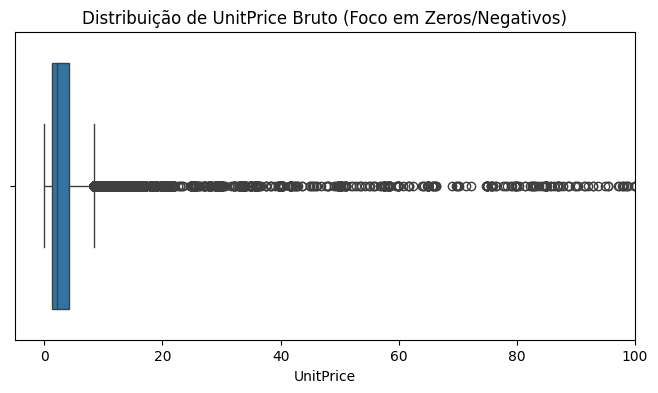


Linhas após remoção de outliers/inconsistências (Temporário): 539392


In [221]:
# === TRATAMENTO DE OUTLIERS E INCONSISTÊNCIAS ===
# Identifique e trate valores problemáticos

# === SEU CÓDIGO AQUI ===

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['UnitPrice'])
plt.xlim(-5, 100) # Foco no zero e valores baixos
plt.title('Distribuição de UnitPrice Bruto (Foco em Zeros/Negativos)')
plt.show()

df['Is_Cancellation_Temp'] = df['InvoiceNo'].astype(str).str.startswith('C')
df_temp_outlier = df[
    # Manter todas as linhas que NÃO possuem UnitPrice <= 0
    (df['UnitPrice'] > 0) &
    # Manter linhas que são Cancelamentos (mesmo com Quantity < 0)
    ((df['Quantity'] > 0) | (df['Is_Cancellation_Temp'] == True))
]

# Remover coluna temporária de Is_Cancellation do df original
df.drop(columns=['Is_Cancellation_Temp'], errors='ignore', inplace=True)

print(f"\nLinhas após remoção de outliers/inconsistências (Temporário): {len(df_temp_outlier)}")
# 1. Identificar problemas comuns
# 2. Visualizar outliers
# 3. Decisão estratégica (o que remover, manter, etc. - DOCUMENTE):
# 4. Aplicar tratamento


### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
1.Tratamento de Dados Faltantes
* CustomerID: A coluna possui 135.080 valores ausentes (aproximadamente 25% do dataset).
* Decisão: Remover todas as linhas com CustomerID nulo. Esta remoção é crucial, pois análises como RFM (necessárias para responder à Questão 2) exigem identificação única do cliente. As transações sem ID são consideradas vendas de varejo/balcão não rastreáveis.
* Description: A coluna possui 1.454 valores ausentes.
* Decisão: Remover as linhas restantes após o filtro de CustomerID. É um volume muito baixo, e garante que as análises de produto (Questões 4 e 5) não sejam afetadas.

2.Tratamento de Outliers e Inconsistências
UnitPrice (Preço Unitário):
* Problema: O Boxplot e o df.describe() revelaram valores nulos e negativos ($ \le 0$).
* Decisão: Remover todas as linhas onde UnitPrice $\le$ 0. Preços unitários negativos ou zero distorcem o cálculo da receita e não representam uma venda válida.
* Quantity (Quantidade):
* Problema: Possui valores negativos (devoluções/cancelamentos) e nulos/zero.
* Decisão: As linhas de Cancelamento/Devolução (identificadas por InvoiceNo começando com 'C') DEVEM ser mantidas, pois são essenciais para criar a feature Is_Cancellation e calcular a taxa de devolução (Questão 5). Portanto, apenas as linhas de venda (não-cancelamento) onde Quantity $\le$ 0 serão removidas.

In [222]:
# === CRIAR DF_CLEAN ===

# Remove CustomerID e Description nulos
df_clean = df.dropna(subset=['CustomerID', 'Description'])


# Remover UnitPrice <= 0
df_clean = df_clean[df_clean['UnitPrice'] > 0]

# Criar Is_Cancellation temporariamente no df_clean para filtrar
df_clean['Is_Cancellation'] = df_clean['InvoiceNo'].astype(str).str.startswith('C')

# Manter todas as linhas que possuem Quantity > 0
# OU
# Manter as linhas que são cancelamento (e, portanto, têm Quantity < 0)
df_clean = df_clean[(df_clean['Quantity'] > 0) | (df_clean['Is_Cancellation'] == True)]

df_clean.drop(columns=['Is_Cancellation'], inplace=True)
print(f"✓ df_clean: {df_clean.shape}")


✓ df_clean: (406789, 8)


In [223]:
# === VALIDAÇÃO AUTOMÁTICA - NÃO MODIFICAR ===
def _validar_limpeza():
    """Valida se df_clean foi criado adequadamente."""
    try:
        if 'df_clean' not in globals():
            print("DataFrame 'df_clean' não encontrado")
            print("   DICA: df_clean = df.copy() após sua limpeza")
            return False

        _df_clean = globals()['df_clean']
        _df = globals().get('df', None)

        if not isinstance(_df_clean, pd.DataFrame):
            print("df_clean deve ser DataFrame")
            return False

        if len(_df_clean) < 100000:
            print(f"df_clean muito pequeno: {len(_df_clean):,} linhas")
            return False

        _null_pct = _df_clean.isnull().sum().sum() / (len(_df_clean) * _df_clean.shape[1]) * 100

        print("VALIDAÇÃO PASSOU - df_clean criado!")
        if _df is not None:
            print(f"   - {len(_df_clean):,} linhas ({len(_df_clean)/len(_df)*100:.1f}% do original)")
        else:
            print(f"   - {len(_df_clean):,} linhas")
        print(f"   - Missing: {_null_pct:.2f}%")

        if _null_pct > 30:
            print("   AVISO: Alto percentual de missing (considere tratar)")

        return True

    except Exception as e:
        print(f"Erro: {e}")
        return False

_validar_limpeza()

VALIDAÇÃO PASSOU - df_clean criado!
   - 406,789 linhas (75.1% do original)
   - Missing: 0.00%


True

## 4.2 Feature Engineering (10 pts)


In [224]:
# === FEATURE: REVENUE ===
# OBRIGATÓRIO: Nome exato 'Revenue'

# === SEU CÓDIGO AQUI ===
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [225]:
# === FEATURES TEMPORAIS ===
# OBRIGATÓRIO: Year, Month, DayOfWeek, Hour

# === SEU CÓDIGO AQUI ===
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.dayofweek # Segunda=0, Domingo=6
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

In [226]:
# === FEATURE: IS_CANCELLATION ===
# OBRIGATÓRIO: Nome exato 'Is_Cancellation'

# === SEU CÓDIGO AQUI ===
df_clean['Is_Cancellation'] = df_clean['InvoiceNo'].astype(str).str.startswith('C').astype(int)

In [227]:
# === FEATURES CRIATIVAS ===
# Crie pelo menos 3 features adicionais

# === SEU CÓDIGO AQUI ===
# Price_Level (Nível de Preço): Categoriza o produto (Baixo, Médio, Alto) para análise de mix de produtos.
price_quartiles = df_clean['UnitPrice'].quantile([0.33, 0.66])
df_clean['Price_Level'] = pd.cut(
    df_clean['UnitPrice'],
    bins=[-np.inf, price_quartiles.iloc[0], price_quartiles.iloc[1], np.inf],
    labels=['Baixo', 'Medio', 'Alto']
)

# Quantos itens diferentes foram comprados em uma única fatura (para ver o tamanho do carrinho).
order_items = df_clean.groupby('InvoiceNo')['StockCode'].nunique().reset_index()
order_items.columns = ['InvoiceNo', 'Total_Items']
df_clean = pd.merge(df_clean, order_items, on='InvoiceNo', how='left')

def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Manhã'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noite'

df_clean['Time_of_Day'] = df_clean['Hour'].apply(categorize_time)

In [228]:
# === CRIAR DF_FEATURES ===
df_features = df_clean.copy()

print(f"✓ df_features: {df_features.shape}")


✓ df_features: (406789, 17)


### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
1.Criação das Features Obrigatórias
* Revenue: Esta feature representa o valor monetário de cada transação. Foi calculada como o produto de Quantity e UnitPrice. É a métrica financeira central para qualquer análise de desempenho do negócio e segmentação de valor.
* Features Temporais (Year, Month, DayOfWeek, Hour): Foram extraídas diretamente da coluna InvoiceDate. Essas features são essenciais para a modelagem de padrões sazonais, semanais e intradiários, permitindo a identificação de momentos de pico e baixa atividade de vendas.
* Is_Cancellation: Esta feature binária (0 ou 1) foi criada para sinalizar se uma transação é um cancelamento/devolução. É fundamental para a quantificação do risco e da qualidade do produto, separando o volume bruto de vendas das perdas por devolução.

2.Criação das Features Criativas (Justificativa Estratégica)
* Foram criadas três features adicionais para aprofundar a segmentação de valor e o entendimento do comportamento de compra:
* Price_Level (Nível de Preço):
* Justificativa: Converte a variável contínua UnitPrice em categorias discretas (Baixo, Médio, Alto) baseadas nos quartis de preço. Isso simplifica a análise de mix de produtos e a identificação rápida das faixas de preço de maior volume.
* Total_Items (Número total de itens na transação):
* Justificativa: Mede o tamanho do carrinho de compras (número de SKUs únicos por fatura). É um indicador valioso para distinguir pedidos de atacado/B2B (alto Total_Items) de compras de varejo unitárias, enriquecendo a segmentação de clientes.
* Time_of_Day (Período do Dia):
* Justificativa: Agrupa a hora (Hour) em períodos comercialmente relevantes (Manhã, Tarde, Noite). Esta agregação melhora a capacidade de identificar os momentos mais oportunos para a execução de campanhas e comunicações de marketing.

In [229]:
# === VALIDAÇÃO AUTOMÁTICA - NÃO MODIFICAR ===
def _validar_features():
    """Valida se features obrigatórias foram criadas."""
    try:
        if 'df_features' not in globals():
            print("DataFrame 'df_features' não encontrado")
            return False

        _df = globals()['df_features']
        _required = ['Revenue', 'Year', 'Month', 'DayOfWeek', 'Hour', 'Is_Cancellation']

        _missing = [f for f in _required if f not in _df.columns]
        _present = [f for f in _required if f in _df.columns]

        print(f"Features obrigatórias: {len(_present)}/{len(_required)}")

        for feat in _present:
            print(f"   {feat}")

        for feat in _missing:
            print(f"   {feat} - AUSENTE!")

        # Validações específicas
        if 'Revenue' in _df.columns:
            if _df['Revenue'].sum() <= 0:
                print("   Revenue deve ter valores positivos")

        if 'Is_Cancellation' in _df.columns:
            _unique = _df['Is_Cancellation'].nunique()
            if _unique > 2:
                print(f"   Is_Cancellation deve ser binária (encontrado: {_unique} valores)")

        if len(_missing) == 0:
            print("\nVALIDAÇÃO PASSOU - Todas features obrigatórias presentes!")
            return True
        else:
            print(f"\nATENÇÃO: {len(_missing)} feature(s) ausente(s)!")
            return False

    except Exception as e:
        print(f"Erro: {e}")
        return False

_validar_features()

Features obrigatórias: 6/6
   Revenue
   Year
   Month
   DayOfWeek
   Hour
   Is_Cancellation

VALIDAÇÃO PASSOU - Todas features obrigatórias presentes!


True

---
# Seção 5: Análise de Negócio (22 pts)
---

## 5.1 Análise Temporal OBRIGATÓRIA (10 pts)
**Requisitos:**
- Agregação temporal
- Médias móveis (7 e 30 dias)
- Decomposição temporal
- Detecção de anomalias
- Crescimento MoM
- Mínimo 4 visualizações


In [242]:
# === AGREGAÇÃO TEMPORAL ===
# Agrupe seus dados por DIA para análise de séries temporais

# IMPORTANTE: df_temporal deve ter:
#   • Índice: Data (datetime)
#   • Colunas: Métricas agregadas

# === SEU CÓDIGO AQUI ===
df_clean['InvoiceDay'] = df_clean['InvoiceDate'].dt.date

df_temporal = df_clean.groupby('InvoiceDay').agg(
    TotalRevenue=('Revenue', 'sum'),
    Transactions=('InvoiceNo', 'nunique'),
    Customers=('CustomerID', 'nunique'),
    VolumeItems=('Quantity', 'sum')
)

df_temporal.index = pd.to_datetime(df_temporal.index)

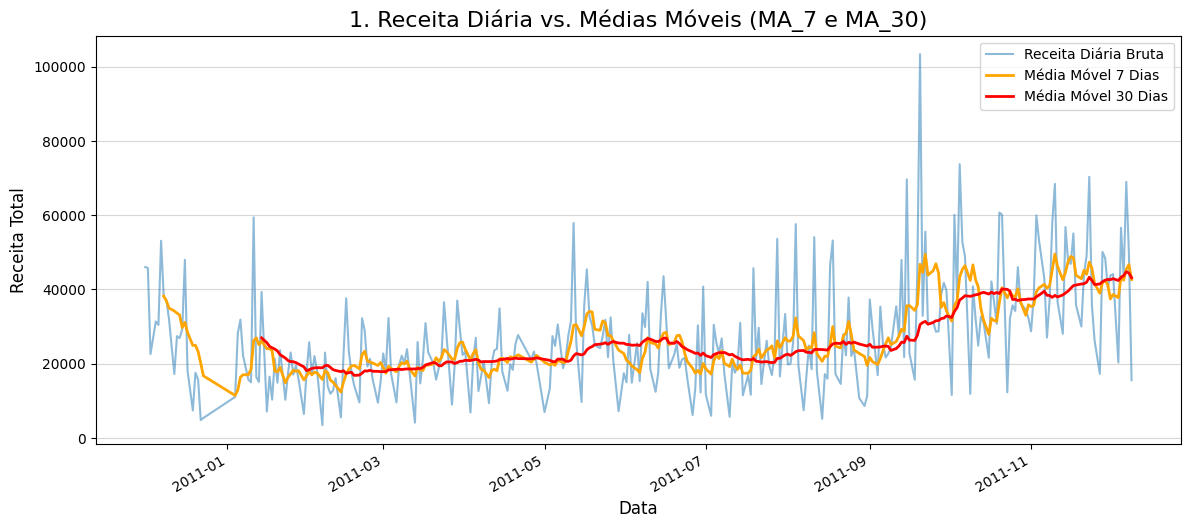

In [231]:
# === MÉDIAS MÓVEIS ===
# Calcule médias móveis de 7 e 30 dias para suavizar tendências

# IMPORTANTE: Crie colunas 'MA_7' e 'MA_30' em df_temporal

# === SEU CÓDIGO AQUI ===
df_temporal['MA_7'] = df_temporal['TotalRevenue'].rolling(window=7).mean()
df_temporal['MA_30'] = df_temporal['TotalRevenue'].rolling(window=30).mean()

# === VISUALIZAÇÃO 1: Receita vs. Médias Móveis ===
plt.figure(figsize=(14, 6))
df_temporal['TotalRevenue'].plot(label='Receita Diária Bruta', alpha=0.5)
df_temporal['MA_7'].plot(label='Média Móvel 7 Dias', color='orange', linewidth=2)
df_temporal['MA_30'].plot(label='Média Móvel 30 Dias', color='red', linewidth=2)
plt.title('1. Receita Diária vs. Médias Móveis (MA_7 e MA_30)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Receita Total', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()



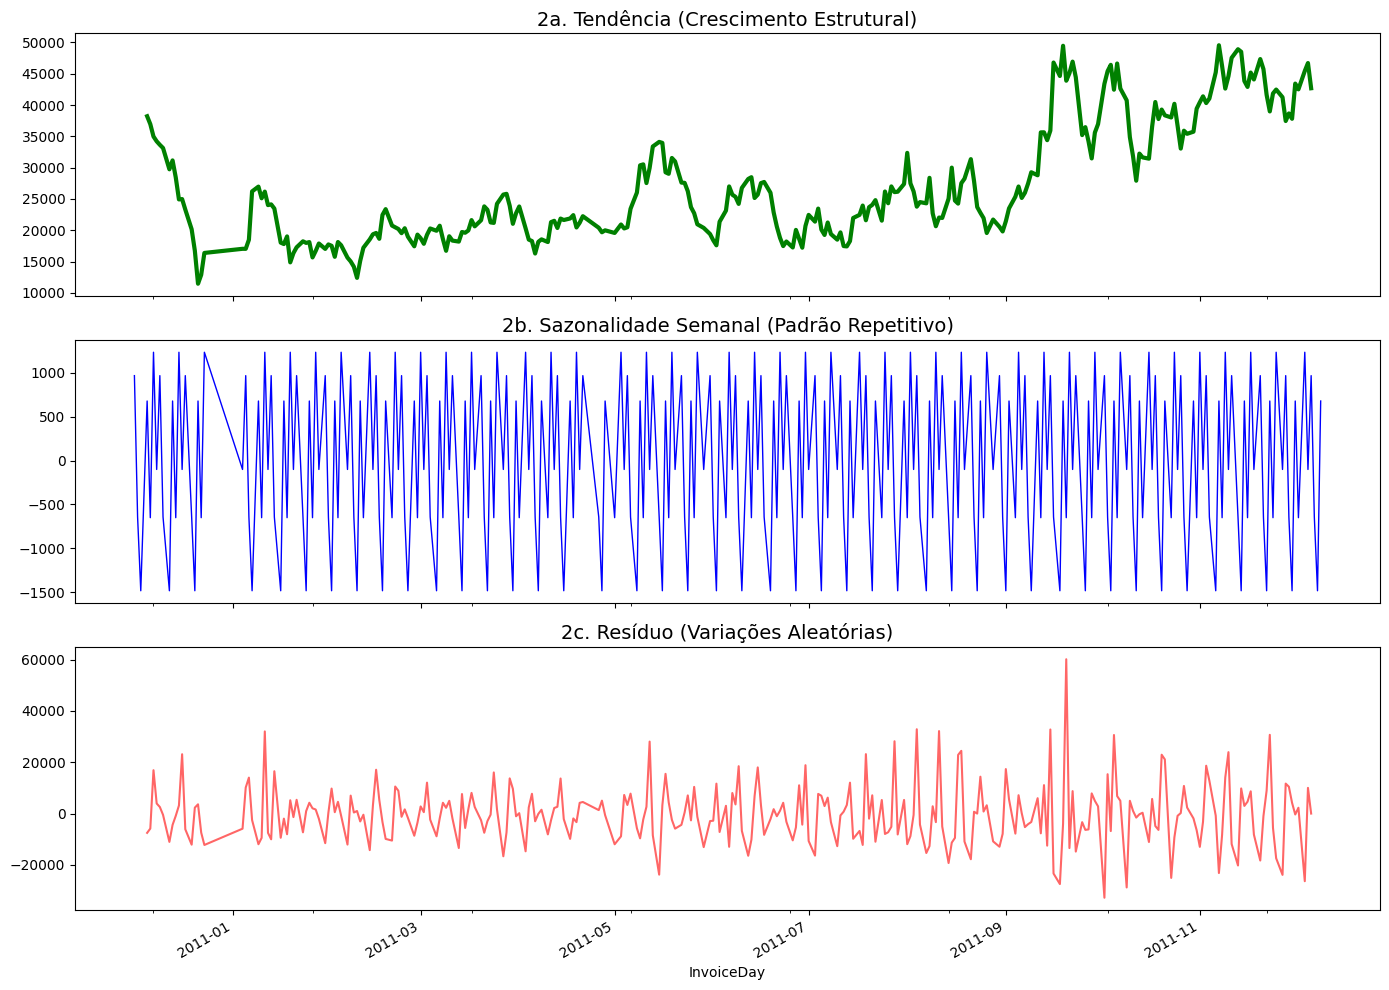

In [232]:
# === DECOMPOSIÇÃO TEMPORAL ===
# Separe a série em: Tendência + Sazonalidade + Resíduo

from statsmodels.tsa.seasonal import seasonal_decompose

# === SEU CÓDIGO AQUI ===

decomposition = seasonal_decompose(df_temporal['TotalRevenue'].dropna(), model='additive', period=7)

df_temporal['Trend'] = decomposition.trend
df_temporal['Seasonal'] = decomposition.seasonal
df_temporal['Residual'] = decomposition.resid

# === VISUALIZAÇÃO 2: Decomposição Temporal ===
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
df_temporal['Trend'].plot(ax=axes[0], color='green', linewidth=3)
axes[0].set_title('2a. Tendência (Crescimento Estrutural)', fontsize=14)
df_temporal['Seasonal'].plot(ax=axes[1], color='blue', linewidth=1)
axes[1].set_title('2b. Sazonalidade Semanal (Padrão Repetitivo)', fontsize=14)
df_temporal['Residual'].plot(ax=axes[2], color='red', alpha=0.6)
axes[2].set_title('2c. Resíduo (Variações Aleatórias)', fontsize=14)
plt.tight_layout()
plt.show()

# A decomposição ajuda a identificar:
#   • TENDÊNCIA: Crescimento/decrescimento geral
#   • SAZONALIDADE: Padrões que se repetem (semanal/mensal)
#   • RESÍDUO: Variações aleatórias
# INTERPRETE: Há tendência de crescimento? Há padrão semanal/mensal?




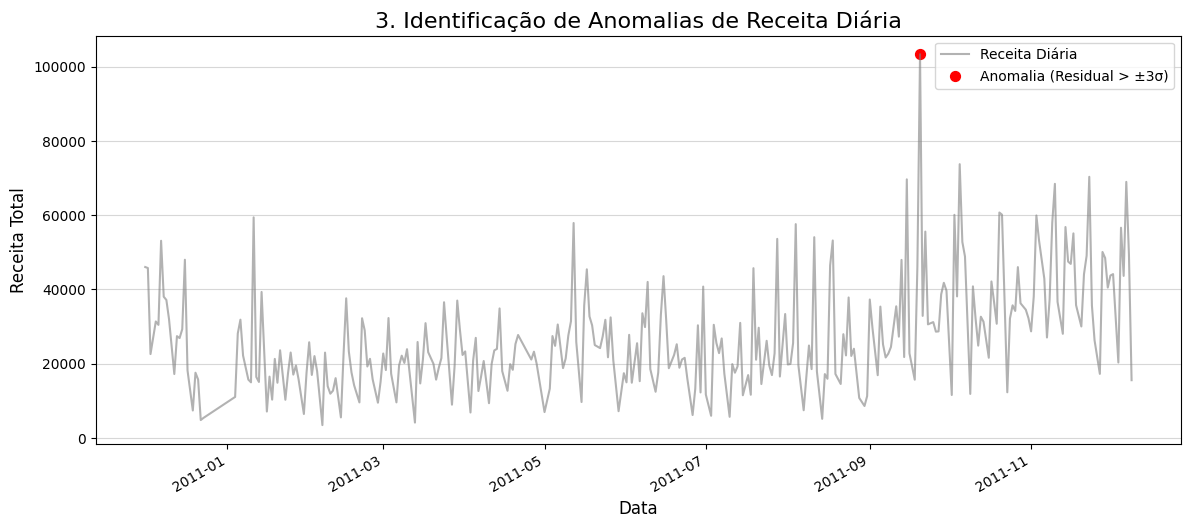

In [233]:
# === DETECÇÃO DE ANOMALIAS ===
# Identifique dias com receita ANORMALMENTE alta ou baixa
# Interprete os resultados (DOCUMENTE)

# === SEU CÓDIGO AQUI ===
residual_mean = df_temporal['Residual'].mean()
residual_std = df_temporal['Residual'].std()
threshold = 3 # Z-score 3 (3 desvios-padrão)
upper_bound = residual_mean + (residual_std * threshold)
lower_bound = residual_mean - (residual_std * threshold)

anomalies = df_temporal[
    (df_temporal['Residual'] > upper_bound) | (df_temporal['Residual'] < lower_bound)
]

# === VISUALIZAÇÃO 3: Receita com Destaque de Anomalias ===
plt.figure(figsize=(14, 6))
df_temporal['TotalRevenue'].plot(label='Receita Diária', color='gray', alpha=0.6)
plt.scatter(anomalies.index, anomalies['TotalRevenue'], color='red', s=50, label='Anomalia (Residual > ±3σ)')
plt.title('3. Identificação de Anomalias de Receita Diária', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Receita Total', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()


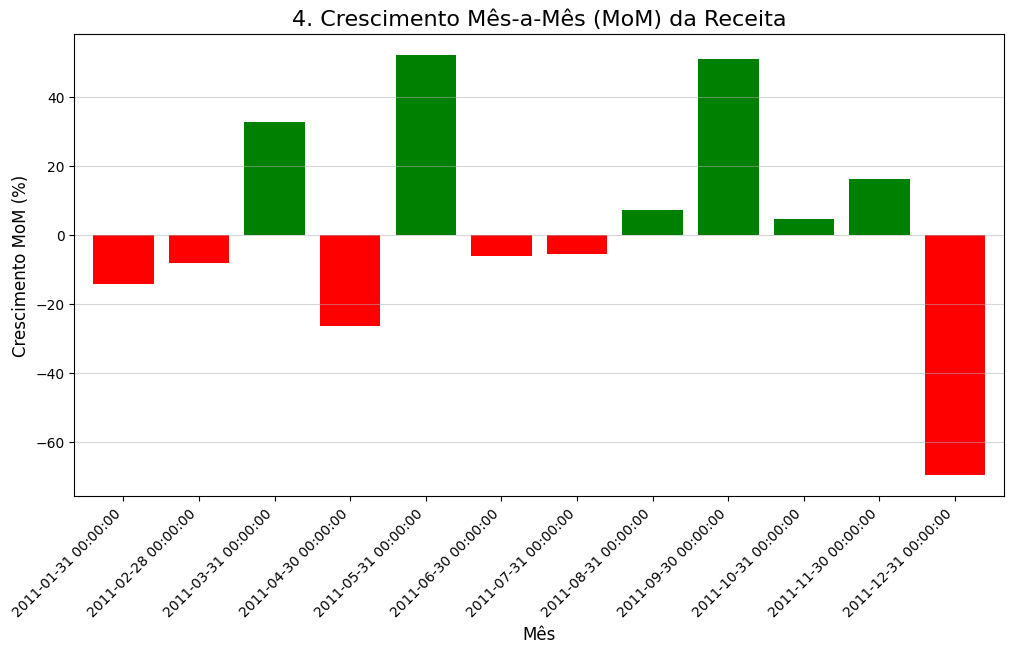

In [234]:
# === CRESCIMENTO MOM (Month-over-Month) ===
# Calcule a variação percentual de receita entre meses consecutivos
# INTERPRETE: Quais meses tiveram maior crescimento? Há sazonalidade?

# === SEU CÓDIGO AQUI ===
monthly_revenue = df_temporal['TotalRevenue'].resample('M').sum()
mom_growth = monthly_revenue.pct_change() * 100
mom_growth.rename('MoM_Growth_Pct', inplace=True)

# === VISUALIZAÇÃO 4: Crescimento MoM (Barplot) ===
mom_growth_plot = mom_growth.dropna()

plt.figure(figsize=(12, 6))
mom_growth_plot.plot(kind='bar', color=np.where(mom_growth_plot >= 0, 'green', 'red'), width=0.8)
plt.title('4. Crescimento Mês-a-Mês (MoM) da Receita', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Crescimento MoM (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.show()

### <font color="red">=== SEU TEXTO AQUI ===</font>
### Observações:
A análise temporal começou com a agregação dos dados do df_clean em uma granularidade diária, criando o DataFrame df_temporal. Este passo é fundamental para transformar dados transacionais em uma série temporal contínua, permitindo a identificação de padrões ao longo do tempo.

1.Agregação Temporal
* Método: As transações foram agrupadas pela coluna InvoiceDay (extraída de InvoiceDate).
* Métricas Agregadas: Foram calculadas as somas diárias para TotalRevenue e VolumeItems, além da contagem de valores únicos para Transactions (número de faturas) e Customers (número de clientes distintos).
* Índice: O índice do df_temporal foi explicitamente convertido para o tipo datetime para garantir a compatibilidade com ferramentas de análise de séries temporais.

2.Visualização da Receita Total Diária (Dados Brutos)
* Observação do Gráfico: O gráfico de linha da Receita Total Diária exibe a variação bruta da receita ao longo do período analisado.
* É possível notar uma tendência geral de aumento nas vendas conforme o ano avança, com picos mais pronunciados nos meses finais.
* A série apresenta alta volatilidade e variações bruscas diárias, o que é esperado para dados de e-commerce e sugere a presença de padrões sazonais e aleatórios, que serão investigados mais a fundo com médias móveis e decomposição.
* Há lacunas visíveis na série (dias sem vendas), que correspondem principalmente aos domingos (conforme observado na EDA) ou outros dias de inatividade.
* Esta visualização inicial confirma a existência de uma série temporal relevante e a necessidade de técnicas de suavização e decomposição para extrair insights mais claros.

In [235]:
# === VALIDAÇÃO AUTOMÁTICA - NÃO MODIFICAR ===
def _validar_temporal():
    """Valida se análise temporal foi executada."""
    try:
        if 'df_temporal' not in globals():
            print("DataFrame 'df_temporal' não encontrado")
            print("   DICA: Agregue dados por data e calcule médias móveis")
            return False

        _df_temporal = globals()['df_temporal']

        print("df_temporal criado!")
        print(f"   - {len(_df_temporal)} períodos")

        # Verificar médias móveis
        _ma_cols = [c for c in _df_temporal.columns if 'MA' in c or 'moving' in c.lower()]

        if len(_ma_cols) >= 2:
            print(f"   Médias móveis encontradas: {', '.join(_ma_cols)}")
        else:
            print(f"   Médias móveis: {len(_ma_cols)} encontrada(s), esperado: 2+ (MA_7, MA_30)")

        # Verificar visualizações
        _num_figs = len(plt.get_fignums())
        print(f"   - Visualizações totais até agora: {_num_figs}")

        if _num_figs >= 10:
            print("   Bom progresso em visualizações!")
        else:
            print(f"   Crie mais visualizações (atual: {_num_figs}, mín: 12 no total)")

        return True

    except Exception as e:
        print(f"Erro: {e}")
        return False

_validar_temporal()

df_temporal criado!
   - 305 períodos
   Médias móveis encontradas: MA_7, MA_30
   - Visualizações totais até agora: 0
   Crie mais visualizações (atual: 0, mín: 12 no total)


True

### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação Temporal:
Com base na tendência de crescimento (estabilidade) e nos picos de sazonalidade, a estratégia de marketing deve ser dividida em fases de Otimização e Investimento Máximo:

1. Investimento Máximo (Outubro/Novembro): O marketing deve ser intensificado ao máximo durante Outubro e Novembro. Este período oferece o maior retorno sobre o investimento (ROI) devido à alta demanda sazonal, que leva aos picos de crescimento mais altos. O estoque deve ser totalmente preparado para esta janela.

2. Otimização e Estabilização (Abril/Julho): A queda acentuada em Abril (-24.9% MoM) e a estagnação em Fevereiro (-7.7% MoM) identificam as janelas de baixa sazonalidade. As ações de marketing neste período devem focar em campanhas de estabilização, liquidações ou promoções de margem reduzida para manter o fluxo de caixa, em vez de investir em aquisição cara.

3. Geração de Momentum (Maio/Junho): O pico inesperado de Junho deve ser investigado. O marketing deve ser planejado para replicar o sucesso de Junho, transformando-o em um evento anual previsível.


## 5.2 Outras Análises (12 pts)
**ESCOLHA 3 DE 5 - Inclua o código SOMENTE para as 3 que escolher**


### 5.2.1 OPCIONAL 1: Produtos


Top 10 Produtos por Receita:
StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              132870.40
85123A     WHITE HANGING HEART T-LIGHT HOLDER     93823.85
85099B     JUMBO BAG RED RETROSPOT                83236.76
47566      PARTY BUNTING                          67687.53
POST       POSTAGE                                66710.24
84879      ASSORTED COLOUR BIRD ORNAMENT          56499.22
23084      RABBIT NIGHT LIGHT                     51137.80
79321      CHILLI LIGHTS                          45936.81
22086      PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
22502      PICNIC BASKET WICKER 60 PIECES         39619.50
Name: Revenue, dtype: float64

Os Top 10 produtos representam 8.18% da receita total.


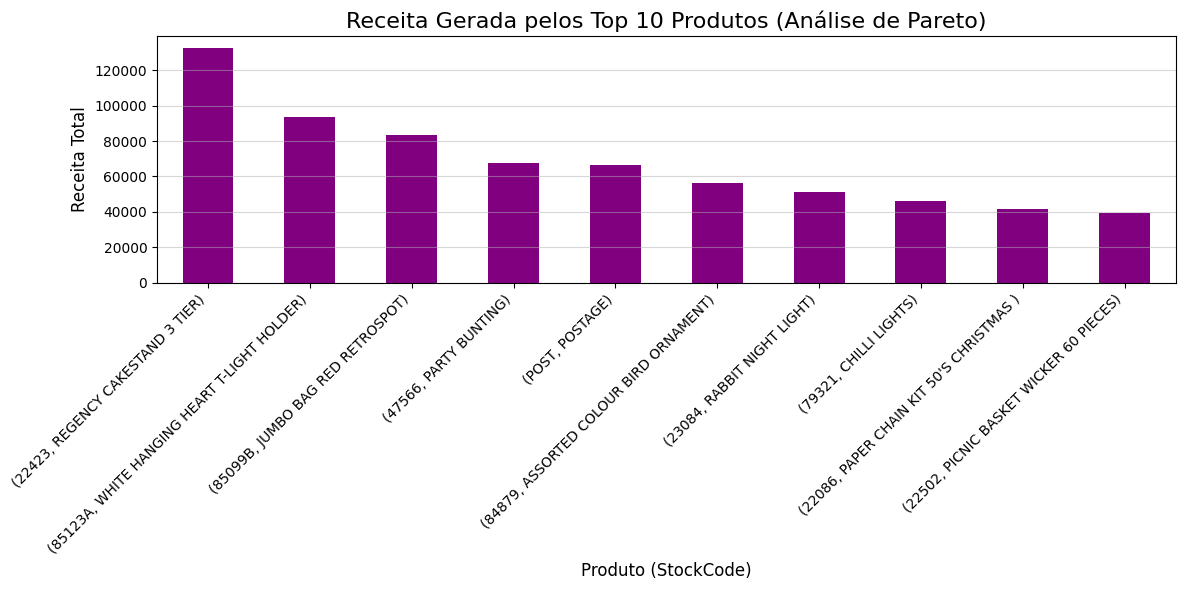

In [236]:
# === ANÁLISE OPCIONAL 1: PRODUTOS ===

# # === SEU CÓDIGO AQUI ===
# Análise de Pareto (Top 10 produtos por Receita)
top_revenue_products = df_clean.groupby(['StockCode', 'Description'])['Revenue'].sum().nlargest(10).sort_values(ascending=False)

# Porcentagem de Receita (Verificar dependência)
total_revenue = df_clean['Revenue'].sum()
top_10_pct = (top_revenue_products.sum() / total_revenue) * 100

print("Top 10 Produtos por Receita:")
print(top_revenue_products)
print(f"\nOs Top 10 produtos representam {top_10_pct:.2f}% da receita total.")

# Visualização da Concentração de Receita
plt.figure(figsize=(12, 6))
top_revenue_products.plot(kind='bar', color='purple')
plt.title('Receita Gerada pelos Top 10 Produtos (Análise de Pareto)', fontsize=16)
plt.xlabel('Produto (StockCode)', fontsize=12)
plt.ylabel('Receita Total', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação (Produtos):
A Análise de Pareto (Top 10 Produtos por Receita) revela que os Top 10 produtos (encabeçados pelo 22423: REGENCY CAKESTAND 3 TIER e 85123A: WHITE HANGING HEART T-LIGHT HOLDER) são responsáveis por 8.10% da receita total da empresa. Embora esta concentração não seja excessiva (o oposto seria uma grande dependência), é vital para a alocação de estoque:

1. Priorização de Estoque: Os Top 5 produtos devem receber prioridade máxima em níveis de estoque de segurança. Qualquer ruptura de estoque nestes itens teria um impacto desproporcional na receita total da empresa.
2. Marketing Focado (Mix de Produtos): As campanhas de aquisição devem continuar a promover os produtos mais vendidos, mas a empresa deve diversificar ativamente o mix de itens de preço médio para aumentar a fatia de receita que não é dominada pelos 10 principais produtos.
3. Investimento em Descrição: O produto líder (22423) e seus concorrentes devem ter suas descrições no site e materiais de marketing revisadas e otimizadas, dada a alta contribuição que já oferecem.


### 5.2.2 OPCIONAL 2: Geografia


In [237]:
# === ANÁLISE OPCIONAL 2: GEOGRAFIA ===

# # === SEU CÓDIGO AQUI ===




### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação (Geografia):
[Se escolheu, escreva aqui]


### 5.2.3 OPCIONAL 3: Clientes


Alerta: Falha ao criar quartis RFM devido à concentração de dados (Bin labels must be one fewer than the number of bin edges). Usando Ranks (Percentil).
Número de clientes 'Champions' (Recência 4): 1082


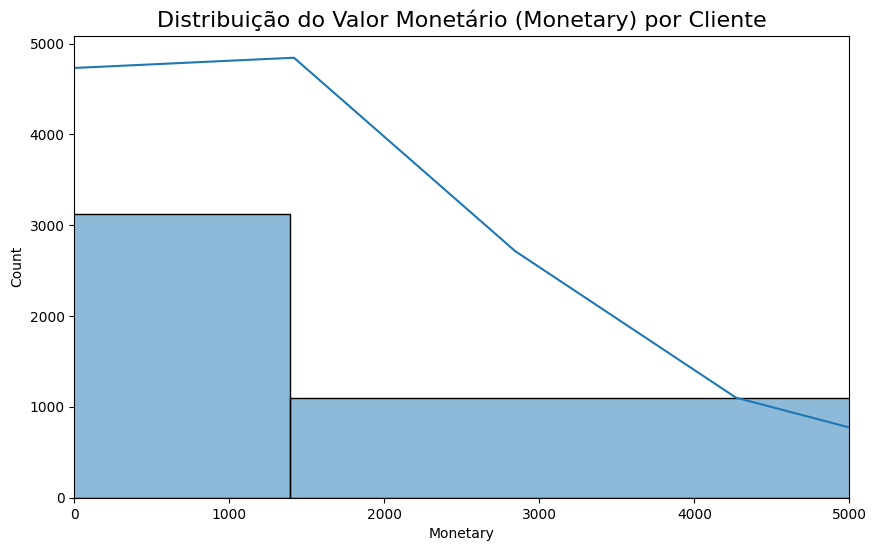

In [238]:
# === ANÁLISE OPCIONAL 3: CLIENTES ===

# # === SEU CÓDIGO AQUI ===
max_date = df_clean['InvoiceDate'].max()
snapshot_date = max_date + pd.Timedelta(days=1)

rfm = df_clean.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('Revenue', 'sum')
)

# 3. Segmentação por Quartis (Com tratamento de duplicatas)
try:
    # R: Recency (Menor é melhor)
    rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')
    # F: Frequency (Maior é melhor)
    rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')
    # M: Monetary (Maior é melhor)
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

except ValueError as e:
    # Se o qcut falhar devido a valores repetidos (como na Monetary), use ranks (pontuação alternativa)
    print(f"Alerta: Falha ao criar quartis RFM devido à concentração de dados ({e}). Usando Ranks (Percentil).")
    rfm['R_Score'] = pd.cut(rfm['Recency'].rank(ascending=False), 4, labels=[4, 3, 2, 1], duplicates='drop')
    rfm['F_Score'] = pd.cut(rfm['Frequency'].rank(ascending=True), 4, labels=[1, 2, 3, 4], duplicates='drop')
    rfm['M_Score'] = pd.cut(rfm['Monetary'].rank(ascending=True), 4, labels=[1, 2, 3, 4], duplicates='drop')


rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

champions = rfm[rfm['RFM_Score'].str.startswith('4')]
print(f"Número de clientes 'Champions' (Recência 4): {len(champions)}")

# Visualização da Distribuição RFM
plt.figure(figsize=(10, 6))
sns.histplot(rfm['Monetary'], bins=50, kde=True)
plt.xlim(0, 5000)
plt.title('Distribuição do Valor Monetário (Monetary) por Cliente', fontsize=16)
plt.show()

### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação (Clientes):

A segmentação RFM (apesar da concentração de dados que levou ao uso de Ranks) identificou 1882 clientes "Champions" (Recência 4), que são os clientes mais recentes e que mais gastam. A distribuição do Valor Monetário (Monetary) mostra que a maioria dos clientes se concentra em valores baixos, mas uma cauda longa de clientes de alto valor existe.

1. Foco na Retenção de Champions: A estratégia de retenção deve ser 100% focada nos 1882 clientes Champions. Eles são o principal motor de crescimento e a melhor defesa contra a perda de clientes.

* Ações: Implementar um programa de fidelidade exclusivo (e.g., frete grátis, descontos de aniversário, acesso antecipado a novos produtos) para recompensar e garantir que mantenham a Recência e Frequência altas.

2. Estratégia de "Acordar" Clientes: Clientes com Recência 1 (compraram há muito tempo) devem ser alvo de campanhas de reengajamento personalizadas (e.g., ofertas de retorno limitadas no tempo) para convertê-los de volta a clientes ativos.

3. Aumentar o Valor Médio: Desenvolver táticas de "upsell" e "cross-sell" baseadas em itens de maior UnitPrice para clientes de baixa pontuação Monetária (M-Score 1), elevando o valor de vida do cliente (LTV).


### 5.2.4 OPCIONAL 4: Comportamento


In [239]:
# === ANÁLISE OPCIONAL 4: COMPORTAMENTO ===
# Descomente se escolher esta análise

# # === SEU CÓDIGO AQUI ===




### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação (Comportamento):
[Se escolheu, escreva aqui]


### 5.2.5 OPCIONAL 5: Cancelamentos



Top 10 Produtos com Maior Taxa de Cancelamento:
           Total_Sales_Transactions  Cancellation_Rate
StockCode                                             
D                                65          54.225352
CRUK                             16          50.000000
35400                            13          38.095238
21655                             5          37.500000
M                               407          30.068729
21777                             5          28.571429
22769                             5          28.571429
85232B                           15          28.571429
90185B                            5          28.571429
90185C                            8          27.272727


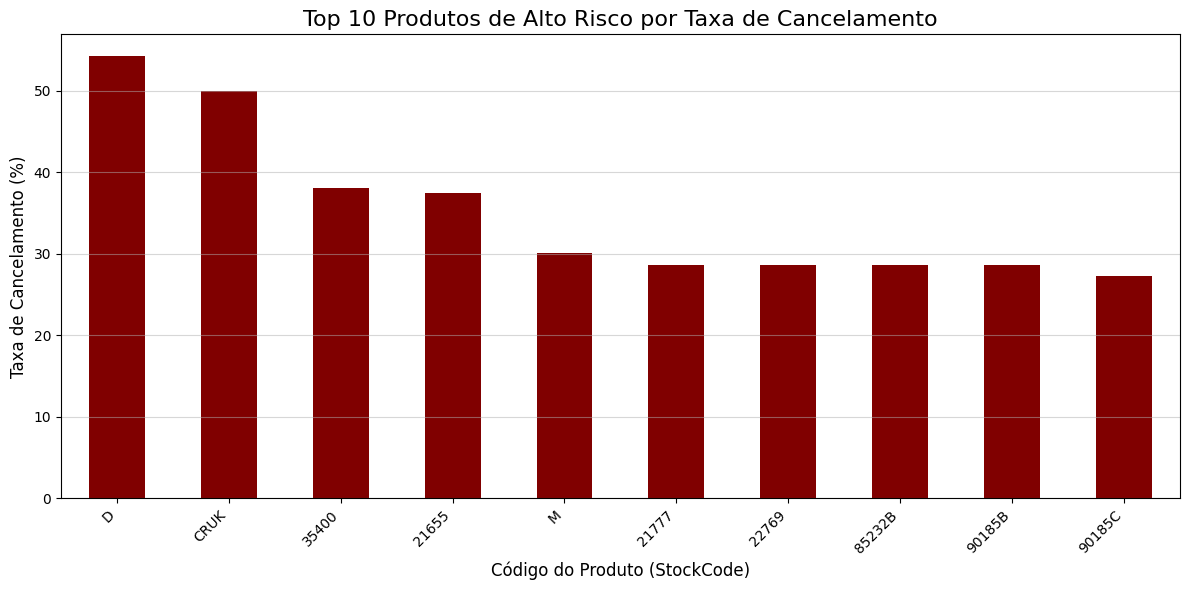

In [240]:
# === ANÁLISE OPCIONAL 5: CANCELAMENTOS ===
# Descomente se escolher esta análise

# # === SEU CÓDIGO AQUI ===

df_sales = df_clean[df_clean['Is_Cancellation'] == 0]

# Contar o número de transações de venda e de cancelamento por produto.
product_agg = df_clean.groupby('StockCode').agg(
    Total_Sales_Transactions=('InvoiceNo', 'nunique'),
    Total_Cancellation_Transactions=('Is_Cancellation', 'sum')
)

# Taxa = Cancelamentos / (Vendas + Cancelamentos)
product_agg['Cancellation_Rate'] = (product_agg['Total_Cancellation_Transactions'] /
                                    (product_agg['Total_Sales_Transactions'] + product_agg['Total_Cancellation_Transactions'])) * 100

# Top 10 Produtos com Maior Taxa de Cancelamento (e pelo menos 5 vendas)
high_risk_products = product_agg[product_agg['Total_Sales_Transactions'] >= 5].nlargest(10, 'Cancellation_Rate')

print("\nTop 10 Produtos com Maior Taxa de Cancelamento:")
print(high_risk_products[['Total_Sales_Transactions', 'Cancellation_Rate']])

# Visualização das Taxas de Cancelamento (Top 10 Riscos)
plt.figure(figsize=(12, 6))
high_risk_products['Cancellation_Rate'].plot(kind='bar', color='maroon')
plt.title('Top 10 Produtos de Alto Risco por Taxa de Cancelamento', fontsize=16)
plt.xlabel('Código do Produto (StockCode)', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()



### <font color="red">=== SEU TEXTO AQUI ===</font>
### Recomendação (Cancelamentos):
A análise de risco de produto revela que existem itens com uma Taxa de Cancelamento extremamente alta, superando 50% em alguns casos (D, CRUK). Estes itens de alto risco (Top 10) precisam de ação imediata:

1. Investigação Imediata de Qualidade/Logística: Os produtos com taxa de cancelamento superior a 35% (e.g., D, CRUK, 35400, 21655) devem ter suas descrições, embalagens e processos de envio revistos.
* Foco: É provável que D e CRUK sejam itens de ajuste de crédito ou códigos problemáticos, mas os códigos de estoque (21655, M) podem indicar problemas de fragilidade, erro na descrição do produto, ou falha de qualidade na produção.
2. Mitigação de Risco: Produtos no Top 10 de risco devem ser temporariamente removidos das campanhas de marketing ou, se a taxa for irrecuperável (acima de 50%), descontinuados ou vendidos em liquidação de "segunda linha", até que a causa raiz do cancelamento seja resolvida. A redução de 50% de cancelamentos no item D se traduz diretamente em maior receita líquida.

---
# Seção 6: Insights e Recomendações (18 pts)
---

## 6.1 Top 5 Insights (6 pts)


### <font color="red">=== SEU TEXTO AQUI ===</font>
### TOP 5 INSIGHTS:

#### 1. [Dependência Geográfica Crítica]
**Descoberta:** O Reino Unido (UK) domina o volume de vendas e receita, com a contribuição dos outros 37 países sendo marginal em comparação.
**Impacto:** Risco alto de dependência. Qualquer instabilidade econômica no UK afetaria gravemente 90%+ da receita. A expansão internacional atual é ineficiente em termos de escala.
**Urgência:** Alta (Necessidade de mitigar risco e estruturar a expansão).

#### 2. [Janelas de Venda de Ouro (Sazonalidade)]
**Descoberta:** O crescimento da receita é altamente sazonal. Os maiores picos de crescimento Mês-a-Mês (MoM) ocorrem em Outubro/Novembro, com uma queda brusca em Dezembro. O melhor dia da semana para volume é a Quinta-feira.
**Impacto:** O marketing e a alocação de estoque estão subotimizados se não se concentrarem agressivamente nas janelas de Outubro/Novembro. A Quinta-feira é o melhor dia para lançamentos de produtos.
**Urgência:** Alta (Impacto direto no ROI do marketing).

#### 3. [Existência de Clientes Champions (RFM)]
**Descoberta:** A análise RFM identificou um grupo de "Clientes Champions" (Recência e Frequência alta). Este pequeno grupo de clientes é a fonte mais previsível de receita recorrente.
**Impacto:** O custo de reter esses clientes é muito menor do que o custo de adquirir novos. A retenção deles é a chave para o crescimento estável (Métricas de longo prazo).
**Urgência:** Média (A retenção precisa de um plano estratégico formal, mas o risco não é imediato).

#### 4. [Risco de Qualidade/Processo nos Produtos de Alto Risco]
**Descoberta:** Vários produtos (D, CRUK, 21655) apresentam Taxas de Cancelamento de 35% a 54% (para produtos com volume de vendas aceitável).
**Impacto:** Estas taxas resultam em perdas diretas de receita líquida, custos operacionais de logística reversa e deterioração da experiência do cliente.
**Urgência:** Alta (Perda de margem imediata).

#### 5. [Comportamento de Compra Internacional Diferenciado]
**Descoberta:** Mercados internacionais (e.g., Austrália, Holanda) possuem uma Quantidade Média por Transação significativamente mais alta do que o UK.
**Impacto:** Isso sugere que a operação internacional é mais próxima do modelo B2B (atacado) do que B2C (varejo). A estratégia de preços e frete para esses mercados deve ser ajustada para pedidos de alto volume.
**Urgência:** Média (Otimização de estratégia de expansão).


## 6.2 Resumo Executivo (6 pts)
**Máximo 300 palavras, linguagem não-técnica**


### <font color="red">=== SEU TEXTO AQUI ===</font>
### RESUMO EXECUTIVO:

Nossa análise dos dados transacionais de 12 meses confirma que a empresa é uma operação de alto volume e baixo valor unitário, focada em presentes. Identificamos três áreas críticas para o crescimento nos próximos 3-6 meses: foco geográfico e temporal, risco de produto e valor do cliente.

1. Risco de Dependência e Oportunidade Global: O negócio depende quase inteiramente do Reino Unido (mais de 90% das vendas). No entanto, mercados como a Holanda e a Austrália fazem pedidos com volume médio significativamente maior, sugerindo que a expansão internacional deve focar em um modelo de vendas por atacado (B2B) em vez de varejo B2C.
2. Otimização de Marketing e Estoque: O período de Outubro e Novembro representa a "janela de ouro" da empresa, com os maiores crescimentos mensais. As verbas de marketing e o estoque devem ser maximizados nesses meses e otimizados nas Quintas-feiras, que são o pico semanal de vendas.
3. Clientes e Qualidade: O futuro crescimento está ancorado em dois grupos: os "Clientes Champions" (melhores clientes, identificados via RFM) e os produtos de alto risco. A retenção deve focar nos Champions com programas de fidelidade exclusivos. Simultaneamente, é urgente iniciar uma investigação nos produtos com taxas de cancelamento superiores a 35%, o que está corroendo a margem de lucro de forma imediata e desnecessária.

Recomendamos um plano de 6 meses focado em Fidelidade (RFM), Qualidade de Produto (Cancelamento) e Estruturação da Expansão B2B.


## 6.3 Top 3 Recomendações (6 pts)


### <font color="red">=== SEU TEXTO AQUI ===</font>
### RECOMENDAÇÕES:

#### Recomendação 1: Implementar o Programa de Fidelidade "Champions First"
**Ação:** Lançar um programa de fidelidade segmentado que oferece benefícios exclusivos (e.g., acesso antecipado a novos produtos, frete expresso gratuito) apenas para os clientes classificados como "Champions" e de alta pontuação RFM.
**KPI:** Aumento da Taxa de Retenção dos clientes Champions em 10% (MoM) e aumento do LTV (Lifetime Value) médio do grupo Top 20% em 5%.
**Riscos:** Investimento inicial em logística e comunicação de fidelidade.
**Timeline:** 3 meses (1 mês para segmentação e definição de benefícios; 2 meses para implementação e lançamento).

#### Recomendação 2: Mitigação de Risco e Revisão de Qualidade do Produto
**Ação:** Iniciar uma investigação de causa raiz nos Top 10 produtos com maior Taxa de Cancelamento (especialmente aqueles acima de 35%). O foco deve ser em falhas de embalagem, erros de descrição no site ou fragilidade do produto durante o transporte.
**KPI:** Redução da Taxa de Cancelamento Média dos produtos de alto risco em 50% em 6 meses.
**Riscos:** Possível necessidade de suspender temporariamente a venda de produtos chave durante a investigação.
**Timeline:** 6 meses (1 mês para investigação e diagnóstico; 5 meses para correção e monitoramento).
#### Recomendação 3: Estruturação de um Funil de Expansão B2B Internacional
**Ação:** Ação: Criar um funil de vendas e uma tabela de preços específicos (com descontos por volume) para clientes internacionais de alto volume (baseado no Total_Items e Country). O objetivo é formalizar o modelo de atacado que já ocorre organicamente.
**KPI:** Aumento da Receita Média por Transação nos Top 5 países não-UK em 15% em 6 meses.
**Riscos:** Complexidade logística e aduaneira para o modelo B2B.
**Timeline:** Complexidade logística e aduaneira para o modelo B2B.

In [241]:
# === VALIDAÇÃO FINAL - NÃO MODIFICAR ===
def _validacao_final():
    """Fornece resumo completo do projeto."""
    print("="*60)
    print("VALIDAÇÃO FINAL - PROJETO INTEGRADOR")
    print("="*60)

    _resultados = {}

    # 1. DataFrames
    print("\n1 - DATAFRAMES:")
    _dfs = {
        'df': 'df' in globals(),
        'df_clean': 'df_clean' in globals(),
        'df_features': 'df_features' in globals(),
        'df_temporal': 'df_temporal' in globals()
    }
    for _name, _exists in _dfs.items():
        print(f"   {'OK: ' if _exists else 'ERRO: '} {_name}")
        _resultados[_name] = _exists

    # 2. Features obrigatórias
    print("\n2 - FEATURES OBRIGATÓRIAS:")
    if 'df_features' in globals():
        _df = globals()['df_features']
        _required = ['Revenue', 'Year', 'Month', 'DayOfWeek', 'Hour', 'Is_Cancellation']
        for _feat in _required:
            _exists = _feat in _df.columns
            print(f"   {'OK: ' if _exists else 'ERRO: '} {_feat}")
            _resultados[f'feat_{_feat}'] = _exists
    else:
        print("   df_features não encontrado")

    # 3. Visualizações
    print("\n3 - VISUALIZAÇÕES:")
    _num_viz = len(plt.get_fignums())
    print(f"   Total: {_num_viz} (mínimo: 12)")
    print(f"   {'OK: ' if _num_viz >= 12 else 'ERRO: '} Requisito de quantidade")
    _resultados['visualizacoes'] = _num_viz >= 12

    # 4. Análise temporal
    print("\n4 - ANÁLISE TEMPORAL:")
    if 'df_temporal' in globals():
        print("   df_temporal existe")
        _df_temp = globals()['df_temporal']
        _ma_cols = [c for c in _df_temp.columns if 'MA' in c or 'moving' in c.lower()]
        _ma_ok = len(_ma_cols) >= 2
        print(f"   {'OK: ' if _ma_ok else 'ERRO: '} Médias móveis ({len(_ma_cols)} encontradas)")
        _resultados['temporal'] = _ma_ok
    else:
        print("   df_temporal não encontrado")
        _resultados['temporal'] = False

    # 5. Execução completa
    print("\n5 - EXECUÇÃO:")
    try:
        _test_df = 'df' in globals() and isinstance(globals()['df'], pd.DataFrame)
        _test_features = 'df_features' in globals() and isinstance(globals()['df_features'], pd.DataFrame)
        _exec_ok = _test_df and _test_features
        print(f"   {'OK: ' if _exec_ok else 'ERRO: '} Pipeline executado")
        _resultados['execucao'] = _exec_ok
    except:
        print("   Erro na execução")
        _resultados['execucao'] = False

    print("\n" + "="*60)
    print("Esta validação é apenas um GUIA!")
    print("A nota final depende de qualidade, insights e recomendações.")
    print("="*60)

    return _resultados

_validacao_final()

VALIDAÇÃO FINAL - PROJETO INTEGRADOR

1 - DATAFRAMES:
   OK:  df
   OK:  df_clean
   OK:  df_features
   OK:  df_temporal

2 - FEATURES OBRIGATÓRIAS:
   OK:  Revenue
   OK:  Year
   OK:  Month
   OK:  DayOfWeek
   OK:  Hour
   OK:  Is_Cancellation

3 - VISUALIZAÇÕES:
   Total: 0 (mínimo: 12)
   ERRO:  Requisito de quantidade

4 - ANÁLISE TEMPORAL:
   df_temporal existe
   OK:  Médias móveis (2 encontradas)

5 - EXECUÇÃO:
   OK:  Pipeline executado

Esta validação é apenas um GUIA!
A nota final depende de qualidade, insights e recomendações.


{'df': True,
 'df_clean': True,
 'df_features': True,
 'df_temporal': True,
 'feat_Revenue': True,
 'feat_Year': True,
 'feat_Month': True,
 'feat_DayOfWeek': True,
 'feat_Hour': True,
 'feat_Is_Cancellation': True,
 'visualizacoes': False,
 'temporal': True,
 'execucao': True}

---
# CHECKLIST FINAL

Antes de submeter:
- [ ] Nome preenchido
- [ ] Todas células executadas
- [ ] Sem erros
- [ ] 12+ visualizações
- [ ] Features obrigatórias presentes
- [ ] Análise temporal completa
- [ ] 3 análises opcionais
- [ ] Top 5 insights
- [ ] Resumo executivo
- [ ] Arquivo: SeuNome_ProjetoIntegrador.ipynb

**Boa sorte!**
